# **pandas를 사용해 금융 시장 데이터를 분석하고 변환하기**

pandas 라이브러리는 **AQR Capital Management** 투자 관리 회사에서 거시 및 신용 거래 전략을 연구하던 웨스 맥키니(Wes McKinney)에 의해 개발되었습니다. 그는 데이터 분석을 위해 유연하고 사용하기 쉬운 데이터 구조를 만들었으며, pandas가 2009년에 오픈 소스로 공개된 이후, Python에서 데이터를 분석하고 변환하는 표준 도구로 자리 잡았습니다.

pandas는 스프레드시트나 데이터베이스에 저장된 것과 같은 표 형식의 데이터를 다루는 데 매우 적합하며, Python 생태계 내 다른 데이터 분석 라이브러리와도 잘 통합됩니다. pandas는 누락된 데이터를 처리하고, 데이터를 재구성하며, 데이터를 병합하고 결합하는 기능을 제공하며, 또한 파일 시스템의 데이터, Excel 파일, 데이터베이스, HDF5 파일 형식과 같은 포맷의 데이터를 불러오는 강력한 도구를 제공합니다. pandas는 풍부한 기능과 사용 용이성 덕분에 학계, 금융업계 및 다양한 비즈니스 분야에서 널리 사용됩니다.

이 장에서는 pandas 데이터 구조를 구축하는 데 도움이 되는 다양한 기법을 다룰 것입니다. 주로 데이터프레임(DataFrame)과 시리즈(Series), pandas의 두 주요 데이터 구조에 초점을 맞출 것입니다. 이러한 구조가 슬라이싱, 인덱싱 및 대규모 데이터셋의 서브셋 추출과 같은 다양한 작업에 어떻게 활용되는지 배울 것입니다. 이는 알고리즘 트레이딩에 매우 중요합니다. 이후, 데이터프레임에서 데이터를 검사하고 선택하는 방법을 배우게 됩니다.

pandas를 활용해 데이터를 조작하는 방법에 대해 충분히 익힌 후에는 알고리즘 트레이딩에 일반적으로 사용되는 분석 기법을 다룰 것입니다. 여기에는 자산 수익률과 수익률 시리즈의 변동성을 계산하는 방법이 포함됩니다. 또한 누적 수익률 시리즈를 생성하고 데이터를 서로 다른 시간 프레임으로 리샘플링하는 방법을 배워 다양한 시간 단위에서 데이터를 분석할 수 있는 유연성을 제공할 것입니다. 실제 데이터셋에서 흔히 발생하는 누락 데이터를 처리하는 방법도 배울 것입니다.

마지막으로, 이 장에서는 사용자 정의 함수를 시간 시리즈 데이터에 적용하는 방법을 다룰 것입니다. 이 장 전체에서 pandas가 **Matplotlib**(데이터 시각화), **NumPy**(수치 연산), 그리고 **Scikit-Learn**(머신러닝)과 같은 과학적 Python 생태계의 다른 라이브러리와 어떻게 통합되는지 확인할 수 있을 것입니다.

이 장에서 다룰 주요 주제는 다음과 같습니다:

- pandas 인덱스 타입 탐구하기  
- pandas 시리즈와 데이터프레임 구축하기  
- 데이터프레임 조작 및 변환하기  
- 데이터프레임에서 데이터 검사 및 선택하기  
- pandas를 사용해 자산 수익률 계산하기  
- 수익률 시리즈 변동성 측정하기  
- 누적 수익률 시리즈 생성하기  
- 다른 시간 프레임으로 데이터 리샘플링하기  
- 누락된 데이터 문제 해결하기  
- 시간 시리즈 데이터를 분석하는 사용자 정의 함수 적용하기  

## **pandas 인덱스 타입 탐구하기**

인덱스(Index)는 **불변(immutable)** 시퀀스로, 데이터프레임의 행이나 시리즈의 요소에 대한 **레이블 또는 키 역할**을 하는 **인덱싱 및 정렬**에 사용됩니다. 이를 통해 빠른 조회와 관계 연산이 가능하며, pandas 버전 2부터는 **정수형, 문자열, 튜플** 등 모든 유형의 값을 포함할 수 있습니다. pandas의 인덱스는 불변이기 때문에 여러 데이터프레임이나 시리즈 간에 안전하게 공유할 수 있습니다. 또한 pandas는 **정렬, 그룹화, 합집합 및 교집합**과 같은 일반 작업에 사용할 수 있는 여러 내장 메서드를 제공하며, **다중 인덱스(MultiIndex)** 를 지원하여 옵션 체인과 같은 **고차원 데이터**를 처리할 수 있습니다. 이 장에서는 MultiIndex의 예제도 다룰 것입니다.  

pandas에는 **7가지 인덱스 타입**이 있으며, 이는 생성할 때 사용된 데이터 유형에 따라 달라집니다. 예를 들어, **Int64Index**는 64비트 정수로 이루어진 인덱스입니다. pandas는 데이터를 기반으로 올바른 인덱스 타입을 자동으로 선택할 만큼 스마트합니다.  

### **어떻게 해야 할까…**  

간단한 정수 시퀀스를 사용해 인덱스를 만들어보겠습니다:

1. **pandas**를 일반적인 별칭 **pd**로 불러옵니다:  

In [29]:
import numpy as np
import pandas as pd
from IPython.display import display

2. **Index 클래스**를 인스턴스화합니다:  

Creates an index with integers from 0 to 9 and displays it

In [30]:
idx_1 = pd.Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

3. 인덱스를 확인합니다:  

다음 코드를 실행하면 다음과 같은 인덱스가 생성되며 타입이 출력됩니다:  

In [31]:
display(idx_1)

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

### **작동 원리…**  

이는 pandas 인덱스를 생성하는 **가장 간단한 예제**입니다. `Index` 클래스를 사용해 **1차원 배열 또는 배열과 같은 데이터 구조**에 값을 넣어서 인덱스를 생성할 수 있습니다.

### **더 알아보기…**  

pandas는 다양한 **인덱스 타입**을 제공하여 많은 사용 사례를 지원합니다. 여기에는 시간 시리즈 분석과 관련된 인덱스도 포함됩니다. 가장 자주 사용되는 몇 가지 인덱스 유형을 살펴보겠습니다:


**DatetimeIndex**  

더 흥미로운 인덱스 타입은 **DatetimeIndex**입니다. 이 인덱스는 **시간 시리즈 데이터**를 다룰 때 매우 유용합니다:  

Generates a date range with daily frequency starting from 2016-01-01 for 6 periods and displays it

In [4]:
days = pd.date_range("2016-01-01", periods=6, freq="D")

다음 코드는 **2016-01-01**부터 시작하는 **6개 날짜**로 이루어진 인덱스를 생성합니다.

In [5]:
display(days)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')

**다양한 주기**(frequency)를 사용할 수 있으며, 예를 들어 **초(second)** 단위는 다음과 같습니다:  

2016-01-01부터 시작하여 100개의 기간을 가진 초 단위의 날짜 범위를 생성하고 표시합니다

In [6]:
seconds = pd.date_range("2016-01-01", periods=100, freq="s")

In [7]:
display(seconds)

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:01',
               '2016-01-01 00:00:02', '2016-01-01 00:00:03',
               '2016-01-01 00:00:04', '2016-01-01 00:00:05',
               '2016-01-01 00:00:06', '2016-01-01 00:00:07',
               '2016-01-01 00:00:08', '2016-01-01 00:00:09',
               '2016-01-01 00:00:10', '2016-01-01 00:00:11',
               '2016-01-01 00:00:12', '2016-01-01 00:00:13',
               '2016-01-01 00:00:14', '2016-01-01 00:00:15',
               '2016-01-01 00:00:16', '2016-01-01 00:00:17',
               '2016-01-01 00:00:18', '2016-01-01 00:00:19',
               '2016-01-01 00:00:20', '2016-01-01 00:00:21',
               '2016-01-01 00:00:22', '2016-01-01 00:00:23',
               '2016-01-01 00:00:24', '2016-01-01 00:00:25',
               '2016-01-01 00:00:26', '2016-01-01 00:00:27',
               '2016-01-01 00:00:28', '2016-01-01 00:00:29',
               '2016-01-01 00:00:30', '2016-01-01 00:00:31',
               '2016-01-

DatetimeIndex는 기본적으로 **시간대 정보가 없습니다(“timezone naive”)**. 시간대 정보가 필요하다면 **`tz_localize`** 를 사용해 **로컬화**할 수 있습니다:  

seconds 날짜 범위를 UTC 시간대로 로컬화하고 표시합니다

In [8]:
seconds_utc = seconds.tz_localize("UTC")

시간대가 다른 지역으로 시간을 조정하려면 **`tz_convert`** 를 사용할 수 있습니다:  

In [9]:
display(seconds_utc)

DatetimeIndex(['2016-01-01 00:00:00+00:00', '2016-01-01 00:00:01+00:00',
               '2016-01-01 00:00:02+00:00', '2016-01-01 00:00:03+00:00',
               '2016-01-01 00:00:04+00:00', '2016-01-01 00:00:05+00:00',
               '2016-01-01 00:00:06+00:00', '2016-01-01 00:00:07+00:00',
               '2016-01-01 00:00:08+00:00', '2016-01-01 00:00:09+00:00',
               '2016-01-01 00:00:10+00:00', '2016-01-01 00:00:11+00:00',
               '2016-01-01 00:00:12+00:00', '2016-01-01 00:00:13+00:00',
               '2016-01-01 00:00:14+00:00', '2016-01-01 00:00:15+00:00',
               '2016-01-01 00:00:16+00:00', '2016-01-01 00:00:17+00:00',
               '2016-01-01 00:00:18+00:00', '2016-01-01 00:00:19+00:00',
               '2016-01-01 00:00:20+00:00', '2016-01-01 00:00:21+00:00',
               '2016-01-01 00:00:22+00:00', '2016-01-01 00:00:23+00:00',
               '2016-01-01 00:00:24+00:00', '2016-01-01 00:00:25+00:00',
               '2016-01-01 00:00:26+00:00', '2016-0

UTC로 로컬화된 날짜 범위를 US/Eastern 시간대로 변환하고 표시합니다

In [10]:
seconds_est = seconds_utc.tz_convert("US/Eastern")

In [11]:
display(seconds_est)

DatetimeIndex(['2015-12-31 19:00:00-05:00', '2015-12-31 19:00:01-05:00',
               '2015-12-31 19:00:02-05:00', '2015-12-31 19:00:03-05:00',
               '2015-12-31 19:00:04-05:00', '2015-12-31 19:00:05-05:00',
               '2015-12-31 19:00:06-05:00', '2015-12-31 19:00:07-05:00',
               '2015-12-31 19:00:08-05:00', '2015-12-31 19:00:09-05:00',
               '2015-12-31 19:00:10-05:00', '2015-12-31 19:00:11-05:00',
               '2015-12-31 19:00:12-05:00', '2015-12-31 19:00:13-05:00',
               '2015-12-31 19:00:14-05:00', '2015-12-31 19:00:15-05:00',
               '2015-12-31 19:00:16-05:00', '2015-12-31 19:00:17-05:00',
               '2015-12-31 19:00:18-05:00', '2015-12-31 19:00:19-05:00',
               '2015-12-31 19:00:20-05:00', '2015-12-31 19:00:21-05:00',
               '2015-12-31 19:00:22-05:00', '2015-12-31 19:00:23-05:00',
               '2015-12-31 19:00:24-05:00', '2015-12-31 19:00:25-05:00',
               '2015-12-31 19:00:26-05:00', '2015-1

**PeriodIndex**  

pandas의 **`period_range`** 메서드를 사용하면 **분기**(quarters)와 같은 기간 인덱스를 생성할 수 있습니다:  

1990년 1분기부터 2000년 4분기까지 11월에 끝나는 분기별 기간 범위를 생성하고 표시합니다

In [12]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

위 코드는 **1990년 1분기**부터 **2000년 4분기**까지의 기간을 생성하며, 각 분기는 **11월**에 끝납니다.

In [13]:
display(prng)

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

**MultiIndex**  

**MultiIndex**는 계층적 인덱스로도 알려져 있으며, pandas의 데이터프레임과 시리즈 내에서 **복잡한 데이터 조직화**를 가능하게 하는 데이터 구조입니다. 이는 데이터가 여러 차원을 가로지르도록 표현할 수 있게 하며, 기본적으로 **2차원** 구조를 가지는 데이터프레임에서도 **다중 레벨 인덱스**를 허용합니다. MultiIndex의 자세한 내용은 이 책의 뒷부분에서 다룰 예정이므로, 지금 당장 명확하게 이해되지 않아도 걱정하지 않아도 됩니다.  

MultiIndex 객체를 생성하려면 **`from_tuples`** 메서드에 튜플 목록을 전달하면 됩니다:  

Creates a MultiIndex from a list of tuples with date and symbol, and displays it

In [14]:
tuples = [
    (pd.Timestamp("2023-07-10"), "WMT"),
    (pd.Timestamp("2023-07-10"), "JPM"),
    (pd.Timestamp("2023-07-10"), "TGT"),
    (pd.Timestamp("2023-07-11"), "WMT"),
    (pd.Timestamp("2023-07-11"), "JPM"),
    (pd.Timestamp("2023-07-11"), "TGT"),
]
midx = pd.MultiIndex.from_tuples(tuples, names=("date", "symbol"))

MultiIndex 객체를 생성하는 방법은 여러 가지가 있습니다. 이 예제에서는 **튜플 목록**을 사용했습니다. 각 튜플은 pandas의 **타임스탬프(timestamp)**와 **티커 심볼(ticker symbol)**을 포함합니다. 튜플 목록을 사용하여 `from_tuples` 메서드를 호출하면 **MultiIndex** 객체가 생성됩니다. 결과적으로 **계층적 데이터프레임**을 지원하는 2차원 인덱스를 얻게 됩니다.  

In [15]:
display(midx)

MultiIndex([('2023-07-10', 'WMT'),
            ('2023-07-10', 'JPM'),
            ('2023-07-10', 'TGT'),
            ('2023-07-11', 'WMT'),
            ('2023-07-11', 'JPM'),
            ('2023-07-11', 'TGT')],
           names=['date', 'symbol'])

> **중요한 참고사항**  
> `from_tuples` 메서드에서 **names** 인자를 사용하면 **레이블 기반 인덱싱**을 위해 인덱스 열에 이름을 부여할 수 있습니다. 이는 **선택 사항**입니다.

### **참고 자료**  

pandas 문서는 매우 자세하게 구성되어 있습니다. 이 레시피에서 다룬 인덱스 타입에 대해 더 알고 싶다면 아래의 자료를 참고하세요:  

- pandas 인덱스 문서: [https://pandas.pydata.org/docs/reference/api/pandas.Index.html](https://pandas.pydata.org/docs/reference/api/pandas.Index.html)  
- pandas DatetimeIndex 문서: [https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)  
- pandas MultiIndex 문서: [https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html)  

## **pandas 시리즈와 데이터프레임 만들기**  

**시리즈(Series)**는 **1차원 레이블 배열**로, 정수, 실수, 문자열, 객체 등 **어떠한 데이터 타입**도 포함할 수 있습니다. Series의 축 레이블은 **인덱스(index)**라고 하며, 이는 데이터 조작 및 접근을 매우 쉽게 만들어줍니다. pandas Series의 핵심 기능 중 하나는 **누락된 데이터**를 처리하는 기능으로, 이는 **NumPy의 `nan`** (Not a Number)으로 표현됩니다.  

---

> **중요**  
> NumPy의 **`nan`** 은 **특별한 부동 소수점 값**입니다. 이는 수치 데이터셋에서 누락된 데이터를 표시하는 데 흔히 사용됩니다. `nan`은 **부동 소수점 값**이기 때문에 수치 연산이나 함수에 유용하게 사용될 수 있습니다. 하지만 다른 값들과는 다르게 **`nan`은 어떤 값과도 같지 않습니다**. 따라서 `nan`을 찾으려면 **`numpy.isnan()`** 이나 **`pandas.isna()`** 와 같은 함수를 사용해야 합니다.  

---

**Series** 객체는 **통계 함수, 문자열 조작, 시각화**와 같은 다양한 작업을 수행할 수 있는 많은 메서드를 제공합니다.  

**데이터프레임(DataFrame)**은 **2차원 데이터 구조**로, 행과 열을 가진 스프레드시트와 비슷합니다. 본질적으로 **표 형식**의 데이터를 표현하며, 숫자와 문자열 같은 서로 다른 타입의 데이터를 가질 수 있습니다. DataFrame은 데이터를 **집계, 슬라이싱, 인덱싱, 병합, 재구성** 등 다양한 방식으로 쉽게 조작할 수 있게 합니다. 또한, 누락된 데이터를 유연하게 처리할 수 있는 기능을 제공하여 **누락 데이터 필터링, 채우기, 조작**을 편리하게 수행할 수 있습니다.

---

### **준비하기**  

Series와 DataFrame을 만들기 전에, **이전 예제**를 완료하고 **인덱스**를 메모리에 저장했는지 확인하세요.

### **어떻게 해야 할까…**  

다음 단계를 실행하여 여러 **Series**로 구성된 **DataFrame**을 생성합니다:

1. **NumPy**를 가져와 정규 분포를 따르는 난수를 생성합니다:  

In [36]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [37]:
obb.user.preferences.output_type = "dataframe"

Generates a date range with second frequency starting from 2016-01-01 for 100 periods and displays it

In [38]:
seconds = pd.date_range("2016-01-01", periods=100, freq="s")

In [39]:
display(seconds)

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:01',
               '2016-01-01 00:00:02', '2016-01-01 00:00:03',
               '2016-01-01 00:00:04', '2016-01-01 00:00:05',
               '2016-01-01 00:00:06', '2016-01-01 00:00:07',
               '2016-01-01 00:00:08', '2016-01-01 00:00:09',
               '2016-01-01 00:00:10', '2016-01-01 00:00:11',
               '2016-01-01 00:00:12', '2016-01-01 00:00:13',
               '2016-01-01 00:00:14', '2016-01-01 00:00:15',
               '2016-01-01 00:00:16', '2016-01-01 00:00:17',
               '2016-01-01 00:00:18', '2016-01-01 00:00:19',
               '2016-01-01 00:00:20', '2016-01-01 00:00:21',
               '2016-01-01 00:00:22', '2016-01-01 00:00:23',
               '2016-01-01 00:00:24', '2016-01-01 00:00:25',
               '2016-01-01 00:00:26', '2016-01-01 00:00:27',
               '2016-01-01 00:00:28', '2016-01-01 00:00:29',
               '2016-01-01 00:00:30', '2016-01-01 00:00:31',
               '2016-01-

2. **DatetimeIndex** 길이와 동일한 길이의 정규 분포를 따르는 난수를 반환하는 함수를 생성합니다:  

Defines a function 'rnd' that returns an array of 100 random numbers

In [5]:
def rnd():
    return np.random.randn(
        100,
    )

위 함수의 반환값은 길이가 **100인 NumPy 배열**입니다. 이 배열은 **정규 분포에서 추출된 난수**로 채워지며, 함수를 호출할 때마다 서로 다른 값 세트를 반환합니다.

> **팁**  
> pandas를 사용할 때, Series와 DataFrame을 **테스트 목적으로 난수로 채우는 것이 일반적**입니다.

3. **DataFrame**을 생성할 **세 개의 pandas Series**를 만듭니다:  

Creates three pandas Series with random data and the previously generated seconds as index

In [6]:
s_1 = pd.Series(rnd(), index=seconds)
s_2 = pd.Series(rnd(), index=seconds)
s_3 = pd.Series(rnd(), index=seconds)

여기서, 이전 예제에서 만든 **DatetimeIndex**를 각 Series의 인덱스로 사용합니다. 이렇게 하면 각 열이 **공통 인덱스**를 기준으로 정렬됩니다.  

4. **딕셔너리**를 사용해 DataFrame을 생성합니다:  

Creates a DataFrame 'df' from the three Series and displays it

In [7]:
df = pd.DataFrame({"a": s_1, "b": s_2, "c": s_3})

결과는 **DatetimeIndex**를 가지고 **초 단위 해상도**로 정렬된 3개의 열을 가진 DataFrame이 됩니다. 각 열은 **정규 분포에서 추출된 난수**로 채워집니다.  

In [8]:
display(df)

,a,b,c
2016-01-01 00:00:00,0.478177,-1.857539,0.567494
2016-01-01 00:00:01,-0.242743,-1.030850,-0.043080
2016-01-01 00:00:02,0.884391,0.365425,0.049214
2016-01-01 00:00:03,0.263809,0.433343,1.158124
2016-01-01 00:00:04,-0.568961,-0.081457,0.963461
...,...,...,...
2016-01-01 00:01:35,0.317249,-0.041964,0.503750
2016-01-01 00:01:36,-1.068928,-2.157246,-0.164432
2016-01-01 00:01:37,-1.074798,-0.658422,0.438152
2016-01-01 00:01:38,-0.417020,-1.001460,-0.038293


### **작동 원리…**  

pandas의 **Series와 DataFrame**은 다양한 방식으로 생성할 수 있습니다. Series는 **배열과 유사한 객체**(예: 리스트, 튜플), 딕셔너리, 스칼라 값을 사용해 만들 수 있습니다. 이 예제에서는 **NumPy 배열과 유사한 객체**를 생성했으며, 이전 예제에서 만든 **DatetimeIndex**를 전달했습니다. 이 인덱스의 길이는 Series를 생성할 때 사용된 배열의 길이와 동일합니다.  

**DataFrame**은 **다차원 구조화된 객체**나 **이터러블**(iterable), **딕셔너리**, 또는 다른 **DataFrame**을 받을 수 있습니다. 이 예제에서는 **Python 딕셔너리**를 전달했으며, 이는 **키-값 쌍** 의 리스트입니다. 각 키는 **열(column) 이름** 을 나타내고, 각 값은 그 열의 데이터를 나타냅니다.  

DataFrame은 `index` 인자를 받아들여, 입력 데이터에 인덱스가 없는 경우에도 인덱스를 구조화할 수 있습니다. `columns` 인자를 사용하면 열의 이름을 설정할 수도 있습니다. Series에 포함된 인덱스를 사용하면 pandas는 자동으로 DataFrame 인덱스를 생성하고 값을 적절하게 정렬합니다. 만약 인덱스에 누락된 데이터가 있다면, pandas는 여전히 인덱스를 포함하되 값은 **`NaN`** 으로 채웁니다.  

---

### **더 알아보기…**  

**MultiIndex** 객체는 **다차원 인덱스**로, DataFrame에 유연성을 추가합니다. **MultiIndex DataFrame**은 처음부터 새로 생성하거나 기존 DataFrame을 **“재인덱싱(reindex)”** 하여 만들 수 있습니다.

**처음부터 MultiIndex DataFrame 만들기**  

이전 예제에서 생성한 **MultiIndex** 객체를 다시 사용합니다:  

Creates a list of tuples with date and symbol

In [16]:
tuples = [
    (pd.Timestamp("2023-07-10"), "WMT"),
    (pd.Timestamp("2023-07-10"), "JPM"),
    (pd.Timestamp("2023-07-10"), "TGT"),
    (pd.Timestamp("2023-07-11"), "WMT"),
    (pd.Timestamp("2023-07-11"), "JPM"),
    (pd.Timestamp("2023-07-11"), "TGT"),
]
midx = pd.MultiIndex.from_tuples(tuples, names=("date", "symbol"))

In [17]:
display(tuples)

[(Timestamp('2023-07-10 00:00:00'), 'WMT'),
 (Timestamp('2023-07-10 00:00:00'), 'JPM'),
 (Timestamp('2023-07-10 00:00:00'), 'TGT'),
 (Timestamp('2023-07-11 00:00:00'), 'WMT'),
 (Timestamp('2023-07-11 00:00:00'), 'JPM'),
 (Timestamp('2023-07-11 00:00:00'), 'TGT')]

이제 인덱스가 준비되었으므로 **DataFrame**을 생성할 수 있습니다:  

Creates a MultiIndex from the list of tuples and assigns it to the index of a new DataFrame 'df'

In [18]:
df = pd.DataFrame(
    {
        "close": [158.11, 144.64, 132.55, 158.20, 146.61, 134.86],
        "factor_1": [0.31, 0.24, 0.67, 0.29, 0.23, 0.71],
    },
    index=midx,
)

이 코드에서 우리는 **딕셔너리**를 사용해 DataFrame을 생성했습니다. **키는 열(column) 이름**이며, 값은 각 열의 데이터입니다. `index` 인자에 **MultiIndex**를 전달했음을 확인하세요.  

결과적으로 **각 날짜별** 세 개의 심볼(symbol)에 대한 레코드를 포함하는 DataFrame이 생성됩니다:

In [28]:
df.loc[(slice(None), 'WMT'), 'close']

date        symbol
2023-07-10  WMT       158.11
2023-07-11  WMT       158.20
Name: close, dtype: float64

In [19]:
display(df)

close  factor_1
date       symbol                  
2023-07-10 WMT     158.11      0.31
           JPM     144.64      0.24
           TGT     132.55      0.67
2023-07-11 WMT     158.20      0.29
           JPM     146.61      0.23
           TGT     134.86      0.71

**MultiIndex 객체를 사용해 기존 DataFrame 재인덱싱하기**  

DataFrame에 **MultiIndex** 객체를 추가하는 것은 흔한 일입니다. 여기서는 **옵션 데이터**를 MultiIndex 객체로 **재인덱싱**하는 예제를 살펴보겠습니다:  


1. **OpenBB 플랫폼**을 가져옵니다:  

 "cboe" 제공자를 사용하여 "SPY" 심볼에 대한 옵션 체인을 가져와서 'chains'에 저장합니다

In [20]:
chains = obb.derivatives.options.chains("SPY", provider="cboe")

NameError: name 'obb' is not defined

In [14]:
display(chains)

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,SPY,590.02,SPY241220C00120000,2024-12-20,-1,120.0,call,26,8,470.7450,...,465.85,468.610001,4.750,0.010136,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
1,SPY,590.02,SPY241220P00120000,2024-12-20,-1,120.0,put,47579,0,0.0000,...,0.00,0.005000,0.000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,SPY,590.02,SPY241220C00130000,2024-12-20,-1,130.0,call,0,335,460.7450,...,459.74,458.759995,0.980,0.002136,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
3,SPY,590.02,SPY241220P00130000,2024-12-20,-1,130.0,put,28959,0,0.0000,...,0.00,0.005000,0.000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,SPY,590.02,SPY241220C00140000,2024-12-20,-1,140.0,call,0,0,450.7450,...,0.00,448.755005,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9343,SPY,590.02,SPY270115P00900000,2027-01-15,755,900.0,put,1,0,309.2550,...,0.00,313.009995,0.000,0.000000,0.2878,-1.0000,0.0000,-0.0672,0.0000,0.0000
9344,SPY,590.02,SPY270115C00905000,2027-01-15,755,905.0,call,14,10,1.0616,...,1.06,1.035000,0.025,0.024155,0.1193,0.0300,0.0007,-0.0043,0.6442,0.3369
9345,SPY,590.02,SPY270115P00905000,2027-01-15,755,905.0,put,0,0,314.2550,...,0.00,318.009995,0.000,0.000000,0.2906,-1.0000,0.0000,-0.0672,0.0000,0.0000
9346,SPY,590.02,SPY270115C00910000,2027-01-15,755,910.0,call,576,48,1.0048,...,0.85,1.075000,-0.015,-0.013954,0.1216,0.0285,0.0006,-0.0041,0.6189,0.3197


2. **OpenBB를 사용해 옵션 체인 데이터를 다운로드합니다**:  

'expiration', 'strike', 'option_type' 열을 사용하여 'chains' DataFrame에 MultiIndex를 설정하고 표시합니다

In [15]:
df = chains.set_index(["expiration", "strike", "option_type"])

결과는 **0에서 시작하는 `RangeIndex`** 를 가진 DataFrame입니다.  

In [19]:
display(df)

contract_symbol  open_interest  volume  \
expiration strike option_type                                              
2024-06-14 350.0  call         SPY240614C00350000            149     147   
                  put          SPY240614P00350000           1061       1   
           355.0  call         SPY240614C00355000              0      64   
                  put          SPY240614P00355000            466       0   
           360.0  call         SPY240614C00360000             32       6   
...                                           ...            ...     ...   
2026-12-18 800.0  put          SPY261218P00800000              1       0   
           805.0  call         SPY261218C00805000              0       0   
                  put          SPY261218P00805000              0       0   
           810.0  call         SPY261218C00810000              0       2   
                  put          SPY261218P00810000              0       0   

                               theoretical_price  last_trade_price       tick  \
expiration strike option_type                                                   
2024-06-14 350.0  call                  192.4600            191.34       down   
                  put                     0.0000              0.01  no_change   
           355.0  call                  187.4600            187.24       down   
                  put                     0.0000              0.01       down   
           360.0  call                  182.4600            181.25       down   
...                                          ...               ...        ...   
2026-12-18 800.0  put                   258.5150            266.86         up   
           805.0  call                    3.1599              0.00  no_change   
                  put                   263.5095              0.00  no_change   
           810.0  call                    2.9770              2.56       down   
                  put                   268.5041              0.00  no_change   

                                  bid  bid_size     ask  ask_size  ...  \
expiration strike option_type                                      ...   
2024-06-14 350.0  call         191.83        60  193.06        50  ...   
                  put            0.00         0    0.01      2814  ...   
           355.0  call         186.85       250  188.06        50  ...   
                  put            0.00         0    0.01      2770  ...   
           360.0  call         181.85       250  183.06        50  ...   
...                               ...       ...     ...       ...  ...   
2026-12-18 800.0  put          256.00        45  260.89        50  ...   
           805.0  call           0.50        46    5.32        75  ...   
                  put          261.00        45  265.88        50  ...   
           810.0  call           0.25        52    5.00        20  ...   
                  put          266.00        45  270.88        50  ...   

                               change  change_percent  implied_volatility  \
expiration strike option_type                                               
2024-06-14 350.0  call         -1.495         -0.0078              0.0000   
                  put           0.005          1.0000              0.0000   
           355.0  call         -0.615         -0.0033              0.0000   
                  put           0.000          0.0000              0.0000   
           360.0  call         -1.605         -0.0088              0.0000   
...                               ...             ...                 ...   
2026-12-18 800.0  put           0.000          0.0000              0.0000   
           805.0  call          0.000          0.0000              0.1207   
                  put           0.000          0.0000              0.0000   
           810.0  call          2.560          0.0000              0.1200   
                  put           0.000          0.0000              0.0000   

                          

3. 옵션(Options)은 만기일(expiration date), 행사가(strike price), 옵션 유형(option type) 등의 기준으로 그룹화되는 파생상품입니다. **`set_index`** 메서드는 리스트의 인자를 받아 그 열을 인덱스로 사용하며, `RangeIndex`를 **MultiIndex** 객체로 변환합니다. 이 예제에서는 **만기일**, **행사가**, **옵션 유형**을 인덱스로 사용합니다:  

In [16]:
df_3 = chains.set_index(["expiration", "strike", "option_type"])

결과는 **3차원 MultiIndex**를 가진 **계층적 DataFrame**입니다.  

In [17]:
display(df_3)

underlying_symbol  underlying_price  \
expiration strike option_type                                       
2024-12-20 120.0  call                      SPY            590.02   
                  put                       SPY            590.02   
           130.0  call                      SPY            590.02   
                  put                       SPY            590.02   
           140.0  call                      SPY            590.02   
...                                         ...               ...   
2027-01-15 900.0  put                       SPY            590.02   
           905.0  call                      SPY            590.02   
                  put                       SPY            590.02   
           910.0  call                      SPY            590.02   
                  put                       SPY            590.02   

                                  contract_symbol  dte  open_interest  volume  \
expiration strike option_type                                                   
2024-12-20 120.0  call         SPY241220C00120000   -1             26       8   
                  put          SPY241220P00120000   -1          47579       0   
           130.0  call         SPY241220C00130000   -1              0     335   
                  put          SPY241220P00130000   -1          28959       0   
           140.0  call         SPY241220C00140000   -1              0       0   
...                                           ...  ...            ...     ...   
2027-01-15 900.0  put          SPY270115P00900000  755              1       0   
           905.0  call         SPY270115C00905000  755             14      10   
                  put          SPY270115P00905000  755              0       0   
           910.0  call         SPY270115C00910000  755            576      48   
                  put          SPY270115P00910000  755              1       0   

                               theoretical_price  last_trade_price  \
expiration strike option_type                                        
2024-12-20 120.0  call                  470.7450            473.36   
                  put                     0.0000              0.01   
           130.0  call                  460.7450            459.74   
                  put                     0.0000              0.01   
           140.0  call                  450.7450            463.78   
...                                          ...               ...   
2027-01-15 900.0  put                   309.2550            294.67   
           905.0  call                    1.0616              1.06   
                  put                   314.2550              0.00   
           910.0  call                    1.0048              1.06   
                  put                   319.2550            304.50   

                                  last_trade_time       tick  ...     low  \
expiration strike option_type                                 ...           
2024-12-20 120.0  call        2024-12-20 15:03:16       down  ...  465.85   
                  put         2024-12-19 14:19:40  no_change  ...    0.00   
           130.0  call        2024-12-20 15:58:27  no_change  ...  459.74   
                  put         2024-12-18 16:06:32  no_change  ...    0.00   
           140.0  call        2024-12-18 09:40:11  no_change  ...    0.00   
...                                           ...        ...  ...     ...   
2027-01-15 900.0  put         2024-12-16 09:51:59       down  ...    0.00   
           905.0  call        2024-12-20 13:47:40       down  ...    1.06   
                  put                         NaT  no_change  ...    0.00   
           910.0  call        2024-12-20 16:06:04  no_change  ...    0.85   
                  put         2024-12-13 15:17:12       down  ...    0.00   

                               prev_close  change  change_percent  \
expiration strike option_type                                       
2024-12-20 120.0  call     

**dot 표기법**을 사용해 인덱스를 확인할 수 있습니다:  

In [18]:
df_3.index

MultiIndex([(2024-12-20, 120.0, 'call'),
            (2024-12-20, 120.0,  'put'),
            (2024-12-20, 130.0, 'call'),
            (2024-12-20, 130.0,  'put'),
            (2024-12-20, 140.0, 'call'),
            (2024-12-20, 140.0,  'put'),
            (2024-12-20, 150.0, 'call'),
            (2024-12-20, 150.0,  'put'),
            (2024-12-20, 160.0, 'call'),
            (2024-12-20, 160.0,  'put'),
            ...
            (2027-01-15, 890.0, 'call'),
            (2027-01-15, 890.0,  'put'),
            (2027-01-15, 895.0, 'call'),
            (2027-01-15, 895.0,  'put'),
            (2027-01-15, 900.0, 'call'),
            (2027-01-15, 900.0,  'put'),
            (2027-01-15, 905.0, 'call'),
            (2027-01-15, 905.0,  'put'),
            (2027-01-15, 910.0, 'call'),
            (2027-01-15, 910.0,  'put')],
           names=['expiration', 'strike', 'option_type'], length=9348)

이렇게 하면 **MultiIndex** 객체는 **튜플의 리스트**로 구성된 것을 확인할 수 있습니다. 각 튜플은 MultiIndex 객체의 요소를 포함합니다. 또한 `names`라는 속성은 MultiIndex의 **레벨 이름** 리스트를 포함합니다.

### **참고 자료**  

Series와 DataFrame 객체에 대해 더 알고 싶다면, 아래 문서를 참고하세요:  

- pandas Series 문서: [https://pandas.pydata.org/docs/reference/api/pandas.Series.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.html)  
- pandas DataFrame 문서: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)  

##  **DataFrame 조작 및 변환**  

더 고급 예제로 넘어가기 전에, 데이터를 다루는 **기본 원리**를 이해하는 것이 중요합니다. **DataFrame**은 pandas에서 가장 많이 사용되는 데이터 구조입니다. DataFrame을 조작하는 수백 가지 메서드가 존재하지만, 이 중 일부만이 정기적으로 사용됩니다.  

이 레시피에서는 다음과 같은 일반적인 방법을 사용해 DataFrame을 조작하는 방법을 다룹니다:  

- **집계, 불리언, 문자열**을 사용하여 **새로운 열 생성하기**  
- **두 개의 DataFrame 연결하기**  
- Excel과 유사하게 **DataFrame 피벗하기**  
- 키 또는 인덱스를 기준으로 데이터를 그룹화하고 **집계 함수 적용하기**  
- 옵션 데이터를 결합하여 **스트래들 가격(straddle prices)** 생성하기  

---

### **시작하기**  

필요한 라이브러리를 가져오고 **시장 가격 데이터**를 다운로드하는 것부터 시작하겠습니다:  

In [19]:
import warnings

1. **NumPy, pandas, OpenBB 플랫폼**을 가져옵니다:  

In [20]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [21]:
warnings.filterwarnings("ignore")
obb.user.preferences.output_type = "dataframe"

2. **작업할 주식 가격 데이터**를 불러옵니다:  

Fetches historical price data for the equity "AAPL" using the "yfinance" provider and stores it in 'asset'

In [22]:
asset = obb.equity.price.historical("AAPL", provider="yfinance")

In [23]:
display(asset)

,open,high,low,close,volume,dividend
date,,,,,,
2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.0
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,0.0
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,0.0
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,0.0
...,...,...,...,...,...,...
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0


Fetches historical price data for the equity "SPY" using the "yfinance" provider and stores it in 'benchmark'

In [24]:
benchmark = obb.equity.price.historical("SPY", provider="yfinance")

In [25]:
display(benchmark)

,open,high,low,close,volume,dividend
date,,,,,,
2023-12-21,471.329987,472.980011,468.839996,472.700012,86667500,0.0
2023-12-22,473.859985,475.380005,471.700012,473.649994,67126600,0.0
2023-12-26,474.070007,476.579987,473.989990,475.649994,55387000,0.0
2023-12-27,475.440002,476.660004,474.890015,476.510010,68000300,0.0
2023-12-28,476.880005,477.549988,476.260010,476.690002,77158100,0.0
...,...,...,...,...,...,...
2024-12-16,606.000000,607.780029,605.210022,606.789978,43695200,0.0
2024-12-17,604.190002,605.169983,602.890015,604.289978,55773500,0.0
2024-12-18,603.979980,606.409973,585.890015,586.280029,108248700,0.0


### **어떻게 해야 할까…**  

DataFrame을 다룰 때 **새로운 열을 생성**하는 것은 일반적인 작업입니다. 지금부터 그 방법을 배워봅시다.

---

### **집계, 불리언, 문자열을 사용해 새로운 열 생성하기**  

다음은 **집계 함수, 불리언 값, 문자열**을 사용해 새로운 열을 생성하는 방법입니다:  

1. **열 이름을 Python 규칙에 맞게 변경하기**:  

Updates the column names for 'asset' and 'benchmark'

In [33]:
# columns = [
#     "open",
#     "high",
#     "low",
#     "close",
#     "volume",
#     "dividends",
#     # "splits",
# ]

# asset 데이터프레임용 columns
columns = [
    "open",
    "high", 
    "low",
    "close",
    "volume",
    "dividends"
]

# asset.columns = columns
# benchmark.columns = columns + ["capital_gain"]

asset.columns = columns

# benchmark 데이터프레임용 columns
benchmark.columns = columns

2. **집계를 사용해 새로운 열 추가하기**:  

Adds a new column 'price_diff' that contains the difference in closing prices

In [34]:
asset["price_diff"] = asset.close.diff()
benchmark["price_diff"] = benchmark.close.diff()

> **팁**  
> DataFrame에 **새 열**을 추가하면, 제공된 데이터는 **DataFrame의 인덱스**에 자동으로 맞춰집니다. 즉, Series를 새 열로 추가하면 pandas는 각 값을 DataFrame의 해당 행과 일치시킵니다. 만약 DataFrame에 없는 인덱스가 Series에 있으면 pandas는 해당 값을 **`NaN`** 으로 채웁니다.

3. **불리언 값을 사용해 새로운 열 추가하기**:  

Adds a new column 'gain' that indicates whether the price difference is positive

In [35]:
asset["gain"] = asset.price_diff > 0
benchmark["gain"] = benchmark.price_diff > 0

4. **문자열 값을 사용해 새로운 열 추가하기**:  

Adds a new column 'symbol' with the equity symbol

In [36]:
asset["symbol"] = "AAPL"
benchmark["symbol"] = "SPY"

이렇게 하면 **returns**, **gain**, **symbol**의 세 개의 새로운 열이 각 DataFrame에 추가됩니다.  

5. **값의 집계를 기반으로 특정 값을 설정하기**:  

'asset_2'의 5~9번째 행의 평균 거래량을 10번째 행의 거래량으로 설정

In [37]:
# asset 데이터프레임을 복사하여 asset_2 생성
asset_2 = asset.copy()

# asset_2의 10번째 행의 거래량을 5~9번째 행의 평균 거래량으로 설정
asset_2.at[asset_2.index[10], "volume"] = asset_2.volume[asset_2.index[5:10]].mean()

위 코드를 통해 **인덱스 10**의 **volume** 값을 **평균(volume.mean)** 으로 설정합니다.

**iat**

iat는 pandas DataFrame이나 Series에서 정수 기반 위치(integer-based location)를 사용하여 단일 값에 빠르게 접근하기 위한 메서드입니다. 

주요 특징을 설명하면 다음과 같습니다:

1. **빠른 접근**: 
- `iat`는 `iloc`보다 더 빠른 접근 방식을 제공합니다
- 단일 값에 접근할 때 최적화되어 있습니다

2. **사용 방법**:
```python
# 기본 문법
df.iat[row_index, column_index]

# 예시
df.iat[0, 0]  # 첫 번째 행, 첫 번째 열의 값
```

3. **제한사항**:
- 오직 정수 인덱스만 사용 가능합니다
- 단일 값에만 접근할 수 있습니다 (슬라이싱 불가)
- 레이블 기반 접근이 필요한 경우 `at` 사용 필요

4. **비교**:
```python
# iat 사용 (더 빠름)
df.iat[1, 2]

# iloc 사용 (더 느림)
df.iloc[1, 2]
```

다음 예시 코드에서 `asset_2.iat[10, 5]`는 asset_2 DataFrame의 11번째 행(인덱스 10)과 6번째 열(인덱스 5)에 있는 단일 값을 빠르게 가져오는 것입니다.


In [38]:
# asset_2의 10번째 행, 5번째 열의 값을 가져옴
asset_2.iat[10, 5]

0.0

**두 개의 DataFrame 연결하기**  

가장 간단한 경우, 두 개의 DataFrame을 연결하면 **행 단위(row-wise)**로 쌓거나 **열 단위(column-wise)**로 나란히 정렬됩니다. 이 작업은 **`axis`** 인자를 통해 제어할 수 있습니다.

**pandas의 `concat`** 메서드를 호출하며, 기본적으로 **행 단위 연결**(row-wise)을 수행합니다:  

Concatenates 'asset' and 'asset_2' and drops duplicates

In [39]:
df = pd.concat([asset, asset_2]).drop_duplicates()

이 메서드는 **DataFrame 목록**을 연결합니다. 이 예제에서는 **두 개의 동일한 DataFrame**을 연결한 후, **`drop_duplicates`** 메서드를 사용하여 중복된 값을 제거했습니다.

In [40]:
display(df)

,open,high,low,close,volume,dividends,price_diff,gain,symbol
date,,,,,,,,,
2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.0,NaN,False,AAPL
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0,-1.079987,False,AAPL
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,0.0,-0.550003,False,AAPL
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,0.0,0.099991,True,AAPL
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,0.0,0.430008,True,AAPL
...,...,...,...,...,...,...,...,...,...
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0,2.440002,True,AAPL
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0,-5.429993,False,AAPL
2024-12-19,247.500000,252.000000,247.089996,249.789993,60882300,0.0,1.739990,True,AAPL


**Excel과 같이 DataFrame 피벗하기**  

종가의 변화율을 포함하는 새로운 'returns' 열을 추가합니다

In [41]:
asset["returns"] = asset["close"].pct_change()

피벗 테이블은 Excel에서 매우 흔히 사용됩니다. 이는 정의된 열 집합을 기반으로 데이터를 **집계(aggregate)** 하는 데 사용됩니다. pandas에서도 동일하게 작동합니다. 이 예제에서는 `sum`, `mean`, `std`의 세 가지 방법을 사용하여 **returns**를 집계합니다:  

'asset'에서 'returns'를 값으로, 'gain'을 열로, 'sum', 'mean', 'std'를 집계 함수로 사용하여 피벗 테이블을 생성합니다

In [42]:
df = pd.pivot_table(
    data=asset, values="returns", columns="gain", aggfunc=["sum", "mean", "std"]
)

결과는 **MultiIndex 열 레이블**을 가진 **피벗된 DataFrame**입니다.

In [43]:
display(df)

sum                mean                 std          
gain        False     True      False     True      False     True 
returns -1.151631  1.444933 -0.010469  0.010248  0.009198  0.010355

**키 또는 인덱스를 기준으로 데이터 그룹화하고 집계 적용하기**  

데이터 그룹화를 사용하면 데이터의 다른 섹션을 집계할 수 있습니다. 이는 시장 데이터와 같이 단일 DataFrame에 여러 자산의 가격이 포함된 경우 유용합니다:

1. **자산 데이터**와 **벤치마크 데이터**를 **동일한 DataFrame**에 결합합니다:  

'asset'과 'benchmark'를 연결하고 'symbol'로 그룹화하여 시가, 고가, 저가, 종가(OHLC) 가격을 계산합니다

In [44]:
concated = pd.concat([asset, benchmark])

In [45]:
concated

,open,high,low,close,volume,dividends,price_diff,gain,symbol,returns
date,,,,,,,,,,
2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.0,NaN,False,AAPL,NaN
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0,-1.079987,False,AAPL,-0.005547
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,0.0,-0.550003,False,AAPL,-0.002841
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,0.0,0.099991,True,AAPL,0.000518
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,0.0,0.430008,True,AAPL,0.002226
...,...,...,...,...,...,...,...,...,...,...
2024-12-16,606.000000,607.780029,605.210022,606.789978,43695200,0.0,2.579956,True,SPY,NaN
2024-12-17,604.190002,605.169983,602.890015,604.289978,55773500,0.0,-2.500000,False,SPY,NaN
2024-12-18,603.979980,606.409973,585.890015,586.280029,108248700,0.0,-18.009949,False,SPY,NaN


2. 결과 DataFrame을 `symbol` 열로 그룹화하고, `adj_close` 열을 반환한 후, **ohlc** 집계를 적용합니다:  

In [46]:
df = concated.groupby("symbol").close.ohlc()

결과는 자산 심볼 **(AAPL)** 과 벤치마크 심볼 **(SPY)** 에 대한 **open, high, low, close** 값을 가지는 DataFrame입니다.  

In [47]:
display(df)

,open,high,low,close
symbol,,,,
AAPL,194.679993,254.490005,165.000000,254.490005
SPY,472.700012,607.809998,467.279999,591.150024


> **TIP**  
> pandas의 **ohlc** 집계는 Resampler 객체입니다. **open**은 그룹의 첫 번째 값, **high**는 그룹의 최대값, **low**는 그룹의 최소값, **close**는 그룹의 마지막 값을 나타냅니다.


**옵션 데이터를 결합해 스트래들 가격 생성하기**  

DataFrame 결합은 SQL **join**과 유사합니다. 이는 **매칭 키**를 기반으로 두 DataFrame을 결합합니다. 대표적인 사용 사례는 옵션 체인을 결합하여 **스트래들 가격(straddle prices)** 을 계산하는 것입니다. **스트래들**은 같은 행사가 및 만기를 가진 **콜 옵션**과 **풋 옵션**을 결합한 복합 옵션 포지션입니다.

1. **OpenBB 플랫폼**을 사용해 옵션 체인 데이터를 다운로드합니다:  

"cboe" 제공자를 사용하여 "AAPL" 심볼에 대한 옵션 체인을 가져와서 'chains'에 저장합니다

In [48]:
chains = obb.derivatives.options.chains("AAPL", provider="cboe")

In [49]:
display(chains)

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,AAPL,254.93,AAPL241220C00005000,2024-12-20,-1,5.0,call,7,0,249.6700,...,0.00,245.325005,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
1,AAPL,254.93,AAPL241220P00005000,2024-12-20,-1,5.0,put,5,2,0.0000,...,0.01,0.005000,0.005,1.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,AAPL,254.93,AAPL241220C00010000,2024-12-20,-1,10.0,call,1,0,244.6700,...,0.00,240.275002,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
3,AAPL,254.93,AAPL241220P00010000,2024-12-20,-1,10.0,put,427,0,0.0000,...,0.00,0.005000,0.000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,AAPL,254.93,AAPL241220C00015000,2024-12-20,-1,15.0,call,1,0,239.9950,...,0.00,235.300003,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,AAPL,254.93,AAPL270115P00430000,2027-01-15,755,430.0,put,0,0,175.0050,...,0.00,179.699997,0.000,0.000000,0.3356,-1.0000,0.0000,-0.0269,0.0000,0.0000
2304,AAPL,254.93,AAPL270115C00440000,2027-01-15,755,440.0,call,171,0,3.4802,...,0.00,3.275000,0.000,0.000000,0.2213,0.1047,0.0022,-0.0092,0.6817,0.4724
2305,AAPL,254.93,AAPL270115P00440000,2027-01-15,755,440.0,put,0,0,185.0050,...,0.00,189.699997,0.000,0.000000,0.3468,-1.0000,0.0000,-0.0269,0.0000,0.0000
2306,AAPL,254.93,AAPL270115C00450000,2027-01-15,755,450.0,call,3813,67,3.0802,...,2.56,2.875000,0.085,0.029565,0.2213,0.0942,0.0020,-0.0086,0.6319,0.4247


In [54]:
chains.shape

(2308, 29)

2. 특정 **만기(expiration)** 에 대한 **콜 옵션**과 **풋 옵션**을 필터링합니다:  

'chains'에서 고유한 만기일을 추출합니다

In [50]:
expirations = chains.expiration.unique()

In [51]:
expirations

array([datetime.date(2024, 12, 20), datetime.date(2024, 12, 27),
       datetime.date(2025, 1, 3), datetime.date(2025, 1, 10),
       datetime.date(2025, 1, 17), datetime.date(2025, 1, 24),
       datetime.date(2025, 1, 31), datetime.date(2025, 2, 21),
       datetime.date(2025, 3, 21), datetime.date(2025, 4, 17),
       datetime.date(2025, 6, 20), datetime.date(2025, 7, 18),
       datetime.date(2025, 8, 15), datetime.date(2025, 9, 19),
       datetime.date(2025, 12, 19), datetime.date(2026, 1, 16),
       datetime.date(2026, 6, 18), datetime.date(2026, 12, 18),
       datetime.date(2027, 1, 15)], dtype=object)

6번째 만기일에 만료되는 콜 옵션을 필터링하여 'calls'에 저장합니다

In [52]:
calls = chains[(chains.option_type == "call") & (chains.expiration == expirations[5])]

6번째 만기일에 만료되는 풋 옵션을 필터링하여 'puts'에 저장합니다

In [53]:
puts = chains[(chains.option_type == "put") & (chains.expiration == expirations[5])]

> **TIP**  
> pandas의 **unique** 메서드는 Series의 **고유한 값** 배열을 반환합니다. 이 경우, 만기일의 고유한 집합을 반환하며, 우리는 **인덱스 5**의 만기일을 선택합니다.  

3. 인덱스를 **행사가(strike price)** 로 설정합니다:  

'calls'와 'puts'의 인덱스를 '행사가(strike)'로 설정합니다

In [55]:
calls_strike = calls.set_index("strike")
puts_strike = puts.set_index("strike")

4. **왼쪽 조인(left join)** 을 사용해 콜 옵션 DataFrame과 풋 옵션 DataFrame을 결합합니다:  

'strike' 인덱스를 기준으로 'calls_strike'와 'puts_strike'를 왼쪽 조인하고, 중복되는 열 이름에 접미사를 추가합니다

In [56]:
joined = calls_strike.join(puts_strike, how="left", lsuffix="_call", rsuffix="_put")

여기서 두 DataFrame 모두 **`LastPrice`** 라는 열을 가지고 있으므로, **`lsuffix`** 와 **`rsuffix`** 를 추가하여 각 `LastPrice` 열을 구분합니다.

**5. 결합된 DataFrame에서 가격 열만 사용하기**  

콜 옵션과 풋 옵션의 마지막 거래 가격을 추출하여 'prices'에 저장합니다

In [57]:
prices = joined[["last_trade_price_call", "last_trade_price_put"]]

In [58]:
display(prices)

,last_trade_price_call,last_trade_price_put
strike,,
100.0,0.00,0.00
105.0,0.00,0.00
110.0,0.00,0.00
115.0,0.00,0.00
120.0,0.00,0.00
125.0,0.00,0.00
130.0,0.00,0.06
135.0,0.00,0.00
140.0,0.00,0.00


**6. 콜 옵션과 풋 옵션의 가격 합산하기**  

콜 옵션과 풋 옵션의 마지막 거래 가격의 합을 포함하는 새로운 'straddle_price' 열을 추가합니다

In [59]:
prices.loc[:, "straddle_price"] = prices.sum(axis=1)

결과는 **행사가(strike)** 를 인덱스로, **콜(call)**, **풋(put)**, 그리고 **스트래들 가격(straddle price)** 이 각 행에 표시된 DataFrame입니다.

In [60]:
display(prices)

,last_trade_price_call,last_trade_price_put,straddle_price
strike,,,
100.0,0.00,0.00,0.00
105.0,0.00,0.00,0.00
110.0,0.00,0.00,0.00
115.0,0.00,0.00,0.00
120.0,0.00,0.00,0.00
125.0,0.00,0.00,0.00
130.0,0.00,0.06,0.06
135.0,0.00,0.00,0.00
140.0,0.00,0.00,0.00


### **작동 원리**  

이 레시피에서는 다양한 **DataFrame 조작 방법**을 다뤘습니다.  

- **열 추가**:  
  DataFrame은 다음과 같은 문법을 사용해 새 열을 추가할 수 있습니다:  
  ```python
  df["new_col"] = value
  ```  

- **집계와 조건 기반 열 생성**:  
  **`groupby`**와 **`agg`** 메서드는 요약 통계를 계산하고 기존 DataFrame에 합칠 수 있습니다.  
  **불리언 인덱싱**을 사용하면 조건을 기반으로 새 열을 만들 수 있습니다:  
  ```python
  df["new_col"] = df["existing_col"] > threshold
  ```

- **`pivot_table`**:  
  데이터 구조를 재조정하여 다차원 분석을 가능하게 합니다. Excel의 피벗 테이블과 비슷합니다.  
  - **`index`**와 **`columns`**를 지정해 행과 열 키를 설정합니다.  
  - **`values`**: 집계할 열을 지정합니다.  
  - **`aggfunc`**: `sum`, `mean`과 같은 집계 함수를 정의합니다.  

  이 메서드는 고유 키 값 조합을 기준으로 새로운 DataFrame을 생성합니다.

- **`groupby`**:  
  데이터 그룹화 및 세분화가 가능합니다. 그룹화된 데이터를 기준으로 **`sum`, `mean`, `apply`** 등의 메서드를 사용할 수 있습니다.

- **`join`**:  
  두 DataFrame을 인덱스를 기준으로 결합합니다.  
  - **`on`**: 결합 기준 열을 지정합니다.  
  - **`how`**: 결합 방식(`left`, `right`, `inner`, `outer`)을 결정합니다.  

결과는 두 DataFrame의 일치하는 **인덱스 또는 열**을 기반으로 결합된 새로운 DataFrame입니다.


### **더 알아보기…**  

pandas의 **`groupby`** 메서드는 데이터의 다른 부분을 집계하고 분석할 수 있어 매우 강력한 기능입니다. 이 메서드를 사용하는 몇 가지 추가 방법을 살펴보겠습니다:

**여러 열을 기준으로 그룹화하기**  

`groupby`는 여러 열을 사용해 데이터를 세부적으로 그룹화할 수 있습니다. 예를 들어, 각 계약의 **`openInterest`** 를 집계해 보겠습니다:  

옵션 종류, 행사가격, 만기일별로 chains를 그룹화하여 미결제약정의 합계를 계산합니다

In [61]:
df = chains.groupby(["option_type", "strike", "expiration"]).open_interest.sum()

결과는 **`option_type`**, **`strike`**, **`expiration`** 으로 구성된 **MultiIndex** 객체를 가진 **Series**입니다. 각 그룹의 값은 **`openInterest`** 의 합계입니다.

In [62]:
display(df)

option_type  strike  expiration
call         5.0     2024-12-20       7
                     2025-01-17    2116
                     2025-03-21     482
                     2025-06-20     879
                     2025-09-19      23
                                   ... 
put          430.0   2027-01-15       0
             440.0   2026-12-18       0
                     2027-01-15       0
             450.0   2026-12-18       0
                     2027-01-15       0
Name: open_interest, Length: 2308, dtype: int64

**다른 열에 다른 메서드 적용하기**  

`agg`를 사용하면 그룹화한 후 특정 열에 대해 특정 메서드를 적용할 수 있습니다. 예를 들어, 각 **`optionType`** 에 대해 **`LastPrice`** 의 최대값과 **`openInterest`** 의 합계를 구할 수 있습니다:  

옵션 종류, 행사가격, 만기일별로 chains를 그룹화하여 최대 거래가격과 미결제약정의 합계를 계산합니다

In [64]:
df = chains.groupby(["option_type", "strike", "expiration"]).agg(
    {"last_trade_price": "max", "open_interest": "sum"}
)

결과는 **`option_type`**, **`strike`**, **`expiration`** 이 인덱스로 설정된 **DataFrame**입니다. 열에는 각 옵션 타입에 대해 **최대 `last_price`** 와 **`open_interest`의 합계** 가 표시됩니다.

In [65]:
display(df)

last_trade_price  open_interest
option_type strike expiration                                 
call        5.0    2024-12-20            242.70              7
                   2025-01-17            243.95           2116
                   2025-03-21            241.56            482
                   2025-06-20            248.76            879
                   2025-09-19            225.65             23
...                                         ...            ...
put         430.0  2027-01-15            203.30              0
            440.0  2026-12-18              0.00              0
                   2027-01-15            192.30              0
            450.0  2026-12-18            221.25              0
                   2027-01-15            217.75              0

[2308 rows x 2 columns]

**사용자 정의 함수 적용하기**  

**`apply`** 메서드를 사용하면 사용자 정의 함수를 적용할 수 있습니다. 예를 들어, 각 **`optionType`** 그룹의 **스프레드**(ask와 bid의 차이)의 평균을 계산한다고 가정해 봅시다:  

Groups 'chains' by option type and calculates the mean bid-ask spread for each group

In [66]:
df = chains.groupby(["option_type"]).apply(
    lambda x: (x["ask"] - x["bid"]).mean()
)

결과는 **`option_type`** 이 인덱스가 된 **Series**이며, 값은 각 옵션 유형의 평균 스프레드입니다.  

In [67]:
display(df)

option_type
call    2.629445
put     1.560737
dtype: float64

> **TIP**  
> **람다 함수**는 `def` 키워드를 사용하여 정의할 수도 있습니다. 람다 함수는 입력 인수를 여러 개 받을 수 있고, 출력도 여러 개 반환할 수 있습니다. **람다 함수는 단일 라인**으로 작성되어야 하며, 짧고 간결한 논리를 표현하는 데 유용합니다.  


**데이터 그룹화 및 변환하기**  

**`transform`** 메서드는 **`groupby`** 와 함께 사용되며, 각 그룹에 메서드를 적용한 후 **원래와 같은 형태** 를 가진 Series를 반환합니다. 예를 들어, 각 **만기일(expiration)** 그룹 내에서 **`lastPrice`** 의 **Z-점수** 를 계산한다고 가정합시다:  

각 만기일 그룹 내에서 평균을 빼고 표준편차로 나누어 마지막 거래 가격을 표준화합니다

In [68]:
(
    chains.groupby("expiration").last_trade_price.transform(
        lambda x: (x - x.mean()) / x.std()
    )
)

0       3.421460
1      -0.633099
2       3.431818
3      -0.633099
4       2.936129
          ...   
2303    1.919351
2304   -0.807633
2305    1.769306
2306   -0.813362
2307    2.116454
Name: last_trade_price, Length: 2308, dtype: float64

이 결과는 **chains**와 같은 길이의 **Series**로, `lastPrice`가 각 **만기일 그룹 내 Z-점수**로 대체됩니다. Z-점수는 특정 그룹 내의 값을 평균과 표준편차를 기준으로 **표준화**하므로, 서로 다른 만기일 그룹의 가격을 비교하는 데 유용합니다.

In [69]:
display(chains)

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,AAPL,254.93,AAPL241220C00005000,2024-12-20,-1,5.0,call,7,0,249.6700,...,0.00,245.325005,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
1,AAPL,254.93,AAPL241220P00005000,2024-12-20,-1,5.0,put,5,2,0.0000,...,0.01,0.005000,0.005,1.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,AAPL,254.93,AAPL241220C00010000,2024-12-20,-1,10.0,call,1,0,244.6700,...,0.00,240.275002,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
3,AAPL,254.93,AAPL241220P00010000,2024-12-20,-1,10.0,put,427,0,0.0000,...,0.00,0.005000,0.000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,AAPL,254.93,AAPL241220C00015000,2024-12-20,-1,15.0,call,1,0,239.9950,...,0.00,235.300003,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,AAPL,254.93,AAPL270115P00430000,2027-01-15,755,430.0,put,0,0,175.0050,...,0.00,179.699997,0.000,0.000000,0.3356,-1.0000,0.0000,-0.0269,0.0000,0.0000
2304,AAPL,254.93,AAPL270115C00440000,2027-01-15,755,440.0,call,171,0,3.4802,...,0.00,3.275000,0.000,0.000000,0.2213,0.1047,0.0022,-0.0092,0.6817,0.4724
2305,AAPL,254.93,AAPL270115P00440000,2027-01-15,755,440.0,put,0,0,185.0050,...,0.00,189.699997,0.000,0.000000,0.3468,-1.0000,0.0000,-0.0269,0.0000,0.0000
2306,AAPL,254.93,AAPL270115C00450000,2027-01-15,755,450.0,call,3813,67,3.0802,...,2.56,2.875000,0.085,0.029565,0.2213,0.0942,0.0020,-0.0086,0.6319,0.4247


### **참고 자료**  

옵션 스트래들에 대한 고품질 설명은 **Investopedia**에서 확인할 수 있습니다:  
- 옵션 스트래들 이해하기: [https://www.investopedia.com/terms/s/straddle.asp](https://www.investopedia.com/terms/s/straddle.asp)

이 레시피에서 사용된 pandas 메서드에 대한 자세한 문서는 아래를 참고하세요:  
- pandas 데이터 구조 연결하기: [https://pandas.pydata.org/docs/reference/api/pandas.concat.html](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)  
- pandas DataFrame 피벗하기: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)  
- pandas DataFrame 그룹화하기: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)  
- pandas DataFrame 결합하기: [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html)  

##  **DataFrame의 데이터 검사 및 선택하기**  

데이터를 불러오고 조작하며 변환한 후, 다음 단계는 **DataFrame에서 데이터를 검색**하는 것입니다. 여기서 **인덱싱과 데이터 선택**이 중요한 역할을 합니다. 이러한 기능은 **iloc** 및 **loc** 메서드와 **불리언 인덱싱**, **query 함수**와 같은 기법을 통해 데이터를 접근하게 합니다.  

이러한 메서드는 특정 행, 열 또는 조건에 기반하여 데이터를 대상으로 합니다. 이를 통해 결측치, 이상치, 불일치와 같은 **잠재적 문제**를 확인할 수 있어 분석 및 모델링에 영향을 줄 수 있습니다. 초기 검사를 통해 데이터에 대한 통찰력을 얻고, 적절한 **전처리 단계와 분석 방법**을 결정할 수 있습니다.  

### **어떻게 해야 할까…**  

주식 가격 데이터를 다운로드하는 것부터 시작하겠습니다:  

1. **pandas와 OpenBB 플랫폼**을 가져옵니다:  

In [1]:
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

2. **데이터를 로드합니다**:  

"yfinance" 제공자를 사용하여 2021-01-01부터 시작하는 "AAPL" 주식의 과거 가격 데이터를 가져와서 'df'에 저장합니다

In [40]:
df = obb.equity.price.historical("AAPL", start_date="2021-01-01", provider="yfinance")

In [42]:
display(df)

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900,0.0
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0.0
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0
...,...,...,...,...,...,...
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0


3. **처음 5개 레코드**를 표시합니다:  

Displays the first 5 rows of 'df'

In [43]:
ddf = df.head(5)

In [44]:
display(ddf)

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900,0.0
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0.0
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0


4. **마지막 5개 레코드**를 표시합니다:  

Displays the last 5 rows of 'df'

In [75]:
ddf = df.tail(5)

In [76]:
display(ddf)

,open,high,low,close,volume,dividend
date,,,,,,
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0
2024-12-19,247.500000,252.000000,247.089996,249.789993,60882300,0.0
2024-12-20,248.119995,255.000000,246.300003,254.490005,125429724,0.0


5. **DataFrame을 NumPy 배열로 반환**합니다:  

Displays the values of 'df'

In [77]:
display(df.values)

array([[1.33520004e+02, 1.33610001e+02, 1.26760002e+02, 1.29410004e+02,
        1.43301900e+08, 0.00000000e+00],
       [1.28889999e+02, 1.31740005e+02, 1.28429993e+02, 1.31009995e+02,
        9.76649000e+07, 0.00000000e+00],
       [1.27720001e+02, 1.31050003e+02, 1.26379997e+02, 1.26599998e+02,
        1.55088000e+08, 0.00000000e+00],
       ...,
       [2.52160004e+02, 2.54279999e+02, 2.47740005e+02, 2.48050003e+02,
        5.67741000e+07, 0.00000000e+00],
       [2.47500000e+02, 2.52000000e+02, 2.47089996e+02, 2.49789993e+02,
        6.08823000e+07, 0.00000000e+00],
       [2.48119995e+02, 2.55000000e+02, 2.46300003e+02, 2.54490005e+02,
        1.25429724e+08, 0.00000000e+00]])

6. **기술 통계**를 확인합니다:  

Displays the statistical summary of 'df'

In [78]:
ddf = df.describe()

In [79]:
display(ddf)

,open,high,low,close,volume,dividend
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000
mean,168.206166,169.995846,166.580580,168.383744,7.392117e+07,0.003719
std,30.089058,30.211096,30.030029,30.175560,3.007402e+07,0.029206
min,119.029999,120.400002,116.209999,116.360001,2.404830e+07,0.000000
25%,145.540001,147.264999,144.120003,145.860001,5.234125e+07,0.000000
50%,165.800003,167.820007,164.429993,165.839996,6.816790e+07,0.000000
75%,184.380005,186.155006,182.695000,184.685005,8.864400e+07,0.000000
max,252.160004,255.000000,249.779999,254.490005,3.186799e+08,0.250000


Transposes 'df' and displays it

In [81]:
ddf = df.T

In [82]:
display(ddf)

date,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-11,2021-01-12,2021-01-13,2021-01-14,2021-01-15,...,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,2024-12-16,2024-12-17,2024-12-18,2024-12-19,2024-12-20
open,1.335200e+02,1.288900e+02,1.277200e+02,1.283600e+02,1.324300e+02,1.291900e+02,1.285000e+02,1.287600e+02,1.308000e+02,1.287800e+02,...,2.418300e+02,2.468900e+02,2.479600e+02,2.468900e+02,2.478200e+02,2.479900e+02,2.500800e+02,2.521600e+02,2.475000e+02,2.481200e+02
high,1.336100e+02,1.317400e+02,1.310500e+02,1.316300e+02,1.326300e+02,1.301700e+02,1.296900e+02,1.314500e+02,1.310000e+02,1.302200e+02,...,2.472400e+02,2.482100e+02,2.508000e+02,2.487400e+02,2.492900e+02,2.513800e+02,2.538300e+02,2.542800e+02,2.520000e+02,2.550000e+02
low,1.267600e+02,1.284300e+02,1.263800e+02,1.278600e+02,1.302300e+02,1.285000e+02,1.268600e+02,1.284900e+02,1.287600e+02,1.270000e+02,...,2.417500e+02,2.453400e+02,2.462600e+02,2.456800e+02,2.462400e+02,2.476500e+02,2.497800e+02,2.477400e+02,2.470900e+02,2.463000e+02
close,1.294100e+02,1.310100e+02,1.266000e+02,1.309200e+02,1.320500e+02,1.289800e+02,1.288000e+02,1.308900e+02,1.289100e+02,1.271400e+02,...,2.467500e+02,2.477700e+02,2.464900e+02,2.479600e+02,2.481300e+02,2.510400e+02,2.534800e+02,2.480500e+02,2.497900e+02,2.544900e+02
volume,1.433019e+08,9.766490e+07,1.550880e+08,1.095782e+08,1.051582e+08,1.003845e+08,9.195110e+07,8.863680e+07,9.022180e+07,1.115985e+08,...,4.464920e+07,3.691480e+07,4.520580e+07,3.277750e+07,3.315530e+07,5.169480e+07,5.135640e+07,5.677410e+07,6.088230e+07,1.254297e+08
dividend,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Displays the column names of 'df'

In [83]:
display(df.columns)

Index(['open', 'high', 'low', 'close', 'volume', 'dividend'], dtype='object')

7. **열 이름을 Python 규칙에 맞게 변경**합니다:  

df의 열 이름을 업데이트합니다

In [85]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'dividend'], dtype='object')

In [86]:
df.columns = [
    "open",
    "high",
    "low",
    "close",
    "volume",
    "dividend",
    # "splits",
]

In [87]:
display(df)

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900,0.0
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0.0
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0
...,...,...,...,...,...,...
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0


8. **하나의 열 선택하기**:  

Accesses the 'close' column using two different methods

In [88]:
df["close"]
df.close

date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2024-12-16    251.039993
2024-12-17    253.479996
2024-12-18    248.050003
2024-12-19    249.789993
2024-12-20    254.490005
Name: close, Length: 999, dtype: float64

> **중요한 참고사항**  
> DataFrame에서 한 열을 선택하면 반환값의 타입은 **Series**입니다. Series에서 DataFrame 메서드를 적용하면 오류가 발생할 수 있습니다. DataFrame으로 반환하려면 **`df[["close"]]`**와 같이 리스트를 사용해야 합니다.

9. **인덱스를 사용해 행 선택하기**:  

Slices the first three rows of 'df'

In [89]:
df[0:3]

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900,0.0
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0.0


> **중요한 참고사항**  
> Python 객체의 인덱스를 슬라이싱할 때, 결과는 마지막 인덱스를 **포함하지 않습니다**. 예를 들어, 인덱스 `0:3`을 사용하면 **인덱스 0, 1, 2**의 값만 반환되며 **인덱스 3**의 값은 포함되지 않습니다.

10. **`DatetimeIndex`** 를 사용해 두 날짜 사이의 데이터 범위 반환하기:  

Slices 'df' by date range (inclusive of the last value) after converting the index to datetime

In [90]:
df.index = pd.to_datetime(df.index)
df["2021-01-02":"2021-01-11"]

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900,0.0
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0.0
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0
2021-01-11,129.190002,130.169998,128.500000,128.979996,100384500,0.0


> **중요한 참고사항**  
> Python 객체를 **레이블로 슬라이싱**할 때, 결과는 **마지막 레이블을 포함합니다**. 예를 들어, `'2021-01-02':'2021-01-11'`을 슬라이싱하면 `2021-01-11` 레이블 위치의 값이 반환됩니다.

**`loc`를 사용한 레이블 기반 선택**  

**`loc`** 메서드는 **레이블 기반 인덱싱**을 사용하여 데이터를 선택하는 데 사용됩니다. 이 메서드를 사용하면 **행과 열의 레이블**을 기반으로 데이터를 선택할 수 있습니다. 특히 DataFrame의 인덱스가 숫자가 아닌 경우 유용합니다.

Displays the index (dates) of 'df'

In [91]:
dates = df.index

In [93]:
display(dates)

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-16', '2024-12-17', '2024-12-18',
               '2024-12-19', '2024-12-20'],
              dtype='datetime64[ns]', name='date', length=999, freq=None)

Accesses the first date in the index

In [94]:
dates[0]

Timestamp('2021-01-04 00:00:00')

1. **단일 행 선택**: Series가 전치되어 열이 행 레이블로 출력됩니다:  

Accesses the row corresponding to the first date in the index

In [95]:
df.loc[df.index[0]]

open        1.335200e+02
high        1.336100e+02
low         1.267600e+02
close       1.294100e+02
volume      1.433019e+08
dividend    0.000000e+00
Name: 2021-01-04 00:00:00, dtype: float64

2. **단일 행과 단일 열 선택**: 스칼라 값이 반환됩니다:  

Accesses the 'close' value for the first date in the index

In [96]:
df.loc[df.index[0], "close"]

129.41000366210938

Accesses the 'open' and 'close' values for the first date in the index

In [97]:
df.loc[df.index[0], ["open", "close"]]

open     133.520004
close    129.410004
Name: 2021-01-04 00:00:00, dtype: float64

3. **행과 열 범위 선택**: 데이터의 일부를 반환합니다:  

Slices the first six rows and selects the 'open' and 'close' columns

In [98]:
df.loc[df.index[0:6], ["open", "close"]]

,open,close
date,,
2021-01-04,133.520004,129.410004
2021-01-05,128.889999,131.009995
2021-01-06,127.720001,126.599998
2021-01-07,128.360001,130.919998
2021-01-08,132.429993,132.050003
2021-01-11,129.190002,128.979996


4. **레이블 범위와 열 범위를 선택**: 데이터의 일부를 반환합니다:  

Slices 'df' by date range and selects the 'open' and 'close' columns

In [99]:
df.loc["2021-01-02":"2021-01-11", ["open", "close"]]

,open,close
date,,
2021-01-04,133.520004,129.410004
2021-01-05,128.889999,131.009995
2021-01-06,127.720001,126.599998
2021-01-07,128.360001,130.919998
2021-01-08,132.429993,132.050003
2021-01-11,129.190002,128.979996


**`iloc`를 사용한 위치 기반 선택**  

**`iloc`** 메서드는 **정수 기반 인덱싱**에 사용되며, DataFrame의 레이블과 관계없이 **정수 위치**를 기준으로 데이터를 선택합니다.

1. **단일 행 선택**: Series가 전치되어 열이 행 레이블로 출력됩니다:  

정수 위치를 사용하여 'df'의 네 번째 행에 접근

In [100]:
df.iloc[3]

open        1.283600e+02
high        1.316300e+02
low         1.278600e+02
close       1.309200e+02
volume      1.095782e+08
dividend    0.000000e+00
Name: 2021-01-07 00:00:00, dtype: float64

2. **행과 열 범위 선택**: 데이터의 일부를 반환합니다:  

정수 위치를 사용하여 세 번째와 네 번째 행, 그리고 처음 두 열을 선택합니다

In [101]:
df.iloc[3:5, 0:2]

,open,high
date,,
2021-01-07,128.360001,131.630005
2021-01-08,132.429993,132.630005


3. **특정 행과 열 조합 선택**:  

Selects specific rows and columns by integer position

In [102]:
df.iloc[[1, 2, 4], [0, 2]]

,open,low
date,,
2021-01-05,128.889999,128.429993
2021-01-06,127.720001,126.379997
2021-01-08,132.429993,130.229996


Slices rows explicitly using integer location

In [103]:
df.iloc[1:3, :]

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0.0


Slices columns explicitly using integer location

In [104]:
df.iloc[:, 1:3]

,high,low
date,,
2021-01-04,133.610001,126.760002
2021-01-05,131.740005,128.429993
2021-01-06,131.050003,126.379997
2021-01-07,131.630005,127.860001
2021-01-08,132.630005,130.229996
...,...,...
2024-12-16,251.380005,247.649994
2024-12-17,253.830002,249.779999
2024-12-18,254.279999,247.740005


Accesses a specific value using integer location

In [105]:
df.iloc[1, 1]

131.74000549316406

빠른 접근 방식을 사용하여 특정 값에 접근

In [106]:
df.iat[1, 1]

131.74000549316406

**불리언 인덱싱을 사용한 선택**  

**불리언 인덱싱**은 DataFrame의 행과 대응하는 **불리언 Series**를 생성합니다. 조건을 만족하면 `True`, 만족하지 않으면 `False`를 반환합니다. 이 불리언 Series를 DataFrame에 전달하면 조건이 `True`인 행만 반환됩니다.

1. **조건이 `True`인 행 확인하기**:  

Uses boolean indexing to select data where 'close' is greater than the mean 'close' value

In [107]:
df.close > df.close.mean()

date
2021-01-04    False
2021-01-05    False
2021-01-06    False
2021-01-07    False
2021-01-08    False
              ...  
2024-12-16     True
2024-12-17     True
2024-12-18     True
2024-12-19     True
2024-12-20     True
Name: close, Length: 999, dtype: bool

2. **단일 열 값을 사용해 데이터 선택하기**:  

In [108]:
df[df.close > df.close.mean()]

,open,high,low,close,volume,dividend
date,,,,,,
2021-12-07,169.080002,171.580002,168.339996,171.179993,120405400,0.0
2021-12-08,172.130005,175.960007,170.699997,175.080002,116998900,0.0
2021-12-09,174.910004,176.750000,173.919998,174.559998,108923700,0.0
2021-12-10,175.210007,179.630005,174.690002,179.449997,115402700,0.0
2021-12-13,181.119995,182.130005,175.529999,175.740005,153237000,0.0
...,...,...,...,...,...,...
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0


3. **결과를 사용해 열 위치 0의 데이터 반환하기**:  

'close' 값이 'close'의 평균보다 큰 첫 번째 열을 선택합니다

In [109]:
df[df.close > df.close.mean()].iloc[:, 0]

date
2021-12-07    169.080002
2021-12-08    172.130005
2021-12-09    174.910004
2021-12-10    175.210007
2021-12-13    181.119995
                 ...    
2024-12-16    247.990005
2024-12-17    250.080002
2024-12-18    252.160004
2024-12-19    247.500000
2024-12-20    248.119995
Name: open, Length: 475, dtype: float64

4. **레이블 기반 인덱싱과 불리언 인덱싱을 결합해 조건 기반 슬라이싱 수행하기**:  

여러 조건을 사용하여 DataFrame을 필터링합니다

In [110]:
df.loc[
    (df.close > df.close.mean())
    & (df.close.mean() > 100)
    & (df.volume > df.volume.mean())
]

,open,high,low,close,volume,dividend
date,,,,,,
2021-12-07,169.080002,171.580002,168.339996,171.179993,120405400,0.0
2021-12-08,172.130005,175.960007,170.699997,175.080002,116998900,0.0
2021-12-09,174.910004,176.750000,173.919998,174.559998,108923700,0.0
2021-12-10,175.210007,179.630005,174.690002,179.449997,115402700,0.0
2021-12-13,181.119995,182.130005,175.529999,175.740005,153237000,0.0
...,...,...,...,...,...,...
2024-08-02,219.149994,225.600006,217.710007,219.860001,105568600,0.0
2024-08-05,199.089996,213.500000,196.000000,209.270004,119548600,0.0
2024-09-20,229.970001,233.089996,227.619995,228.199997,318679900,0.0


### **작동 원리**  

- **`loc`** 메서드:  
  DataFrame이나 Series 내에서 **레이블 기반**의 데이터 선택을 위해 사용됩니다. **행과 열**의 레이블을 참조할 수 있으며, **`df.loc[row, column]`** 형식을 사용합니다. 이를 통해 **슬라이싱**을 지원하며, 여러 행과 열을 레이블 범위를 기준으로 선택할 수 있습니다.  

- **`iloc`** 메서드:  
  **정수 기반 위치**를 참조해 데이터를 선택합니다. **`df.iloc[row, column]`** 형식을 사용하며, 인덱스나 열의 레이블을 무시하고 **정수 위치**만을 사용합니다. 이 메서드는 슬라이싱과 정수 인덱스에 기반한 다중 행 및 열 선택을 지원합니다.  

- **불리언 인덱싱**:  
  **조건 평가**를 기반으로 데이터를 필터링합니다. 특정 열이나 전체 DataFrame에 조건을 적용하면 **불리언 배열**이 반환되며, 이 배열을 사용해 조건이 **`True`**인 행만 추출할 수 있습니다. 예:  

  ```python
  df[boolean_array]
  ```

  여러 조건을 결합하려면 **`&`** (and), **`|`** (or), **`~`** (not) 연산자를 사용할 수 있습니다. **`query`** 메서드는 **불리언 인덱싱**과 동일한 결과를 반환하지만 더 **가독성 있는 문법**을 제공합니다.

### **더 알아보기**  

**인덱싱**은 pandas 작업에서 가장 중요한 부분 중 하나입니다. 이제 데이터 슬라이싱에 대한 고급 예제를 살펴보겠습니다.


**부분 문자열 인덱싱**  

**DatetimeIndex** 객체를 사용해 부분 문자열로 데이터를 선택할 수 있습니다:  

Selects rows from the year 2023

In [111]:
df.loc["2023"]

,open,high,low,close,volume,dividend
date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,112117500,0.0
2023-01-04,126.889999,128.660004,125.080002,126.360001,89113600,0.0
2023-01-05,127.129997,127.769997,124.760002,125.019997,80962700,0.0
2023-01-06,126.010002,130.289993,124.889999,129.619995,87754700,0.0
2023-01-09,130.470001,133.410004,129.889999,130.149994,70790800,0.0
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,0.0
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,0.0


위 코드는 **2023년**의 모든 레코드를 포함하는 DataFrame을 반환합니다. 이때 원본 DataFrame의 열은 유지되며 **2023년 범위 내 행만 포함**됩니다.  

**월 단위**로도 선택할 수 있습니다:  

2023년 7월의 행들을 선택

In [112]:
df.loc["2023-07"]

,open,high,low,close,volume,dividend
date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,31458200,0.0
2023-07-05,191.570007,192.979996,190.619995,191.330002,46920300,0.0
2023-07-06,189.839996,192.020004,189.199997,191.809998,45094300,0.0
2023-07-07,191.410004,192.669998,190.240005,190.679993,46778000,0.0
2023-07-10,189.259995,189.990005,187.039993,188.610001,59922200,0.0
2023-07-11,189.160004,189.300003,186.600006,188.080002,46638100,0.0
2023-07-12,189.679993,191.699997,188.470001,189.770004,60750200,0.0
2023-07-13,190.500000,191.190002,189.779999,190.539993,41342300,0.0
2023-07-14,190.229996,191.179993,189.630005,190.690002,41573900,0.0


위 코드는 **2023년 7월**의 모든 레코드를 반환합니다.

**빠르게 스칼라 값 접근하기**  

특정 셀의 값을 빠르게 가져오려면 **`at`** 접근자를 사용할 수 있습니다. 예를 들어, **2023년 7월 12일**의 **`close`** 가격을 가져오려면 다음과 같이 실행합니다:  

2023년 7월 12일의 'close' 값에 접근

In [113]:
df.at["2023-07-12", "close"]

189.77000427246094

결과는 **2023년 7월 12일**의 **종가**입니다. **`at`** 접근자는 **특정 행-열 쌍**의 단일 값을 매우 빠르게 접근할 수 있게 해줍니다.

**`nsmallest`와 `nlargest` 사용하기**  

pandas는 열의 가장 작은 값이나 가장 큰 값을 구하는 데 유용한 메서드를 제공합니다. 예를 들어, **`volume`** 값이 가장 높은 **5개 행**을 가져오려면:  

'volume'이 가장 높은 상위 5개 행을 선택

In [114]:
df.nlargest(5, "volume")

,open,high,low,close,volume,dividend
date,,,,,,
2024-09-20,229.970001,233.089996,227.619995,228.199997,318679900,0.0
2024-06-21,210.389999,211.889999,207.110001,207.490005,246421400,0.0
2024-06-12,207.369995,220.199997,206.899994,213.070007,198134300,0.0
2021-12-17,169.929993,173.470001,169.690002,171.139999,195432700,0.0
2021-03-19,119.900002,121.430000,119.680000,119.989998,185549500,0.0


결과는 **`volume`** 값이 가장 높은 **5개의 행**을 포함하는 DataFrame입니다.

**`query` 메서드를 사용해 DataFrame 쿼리하기**  

**`query`** 메서드는 DataFrame을 보다 **가독성 있는 방식**으로 쿼리할 수 있습니다. 예를 들어, **`close`** 가격이 **`open`** 가격보다 높은 모든 행을 가져오려면 다음 명령을 실행합니다:  

'close' 가격이 'open' 가격보다 높은 행을 선택하는 쿼리

In [115]:
df.query("close > open")

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0
2021-01-12,128.500000,129.690002,126.860001,128.800003,91951100,0.0
2021-01-13,128.759995,131.449997,128.490005,130.889999,88636800,0.0
2021-01-19,127.779999,128.710007,126.940002,127.830002,90757300,0.0
...,...,...,...,...,...,...
2024-12-13,247.820007,249.289993,246.240005,248.130005,33155300,0.0
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0


결과는 **`close`** 가격이 **`open`** 가격보다 높은 모든 행을 포함하는 DataFrame입니다.

### **참고 자료**  

인덱싱은 복잡할 수 있으므로 연습이 필요합니다. 이 레시피에서는 알고리즘 트레이딩에서 흔히 사용되는 여러 사례를 다루었습니다. 자세한 내용은 pandas 공식 문서를 참고하세요:  
[인덱싱 및 슬라이싱 문서](https://pandas.pydata.org/docs/user_guide/indexing.html)

## **pandas 를 사용한 자산 수익률 계산하기**

수익률은 포트폴리오 성과를 이해하는 데 필수적입니다. 수익률은 크게 **단순 수익률**과 복합 (또는 로그) 수익률의 두 가지 유형이 있습니다.

**단순 수익률**은 한 기간에서 다음 기간으로의 가격 변화량을 해당 기간 시작 가격으로 나눈 값으로 계산됩니다. 단순 수익률은 특정 상황에서 유용합니다. 자산 간의 수익률을 합산할 수 있기 때문에, 포트폴리오의 단순 수익률은 개별 자산의 수익률을 각 자산의 비중에 따라 가중 평균한 값입니다. 단순 수익률은 자산 비교 및 단기 기간 동안의 포트폴리오 성과를 평가하는 데 실용적입니다.

단순 수익률은 다음과 같이 정의됩니다:

$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
$

한편, **복합 수익률**은 가격 변화의 상대적 비율에 자연 로그를 취하여 계산되며, 시간에 걸쳐 가법적 특성을 가집니다. 이 특성은 복합 수익률이 여러 기간에 걸친 분석에 적합하게 만듭니다. 특정 기간의 복합 수익률은 해당 기간 내의 로그 수익률을 합산한 값입니다.

복합 수익률은 다음과 같이 정의됩니다:

$
r_t = \log\left(\frac{P_t}{P_{t-1}}\right) = \log(P_t) - \log(P_{t-1})
$

복합 수익률은 **실제 분석에서 선호되는 경향이 있습니다.** 왜냐하면 복합 수익률은 수학적 특성상 분석에 더 쉽게 사용될 수 있기 때문입니다. 또한 극단적인 값에 덜 민감하여 분석을 왜곡하는 영향을 줄입니다. 단순 수익률의 경우 한 번의 큰 가격 변동이 큰 영향을 미칠 수 있는 반면, 복합 수익률에서는 그 영향이 완화됩니다.

복합 수익률의 가법적 특성은 수학적으로 편리합니다. 여러 기간에 걸친 총 수익률을 계산해야 할 경우, 로그 수익률을 합산하면 됩니다. 반면 단순 수익률의 경우 각 기간 수익률에 1을 더한 후 곱한 값을 구한 뒤 1을 빼야 합니다.

일일 복합 수익률 $ r_t $가 주어진 경우, 이를 통해 해당 단순 순 수익률 $ R_t $을 구하는 것은 다음과 같이 간단합니다:

$
R_t = e^{r_t} - 1
$

단순 수익률과 로그 수익률의 차이는 그들의 통계적 특성을 살펴보면 명확해집니다. 만약 자산 가격이 로그 정규 분포를 따른다고 가정하면, 로그 수익률은 정규 분포를 따르게 됩니다. 그러나 이는 항상 성립하는 가정은 아닙니다. 이러한 가정은 통계 모델링에서 정규 분포가 핵심이기 때문에 유용합니다. 일별 또는 초단기 데이터의 경우, 단순 수익률과 로그 수익률의 차이는 보통 미미하며, 로그 수익률이 대체로 조금 더 작습니다.

### **어떻게 해야 할까...**

OpenBB 플랫폼의 주식 데이터를 사용해 수익률을 계산하기 시작해 봅시다.

1. **Pandas, NumPy 및 OpenBB 플랫폼 가져오기:**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

2. **AAPL(애플) 주식 가격 데이터 다운로드하기:**

"yfinance" 제공자를 사용하여 "AAPL" 주식의 과거 가격 데이터를 가져와서 'data'에 저장합니다

In [116]:
data = obb.equity.price.historical("AAPL", provider="yfinance")

In [117]:
display(data)

,open,high,low,close,volume,dividend
date,,,,,,
2023-12-21,196.100006,197.080002,193.500000,194.679993,46482500,0.0
2023-12-22,195.179993,195.410004,192.970001,193.600006,37122800,0.0
2023-12-26,193.610001,193.889999,192.830002,193.050003,28919300,0.0
2023-12-27,192.490005,193.500000,191.089996,193.149994,48087700,0.0
2023-12-28,194.139999,194.660004,193.169998,193.580002,34049900,0.0
...,...,...,...,...,...,...
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0


3. **종가 데이터 선택하기:**

위치 기반 인덱싱을 사용하여 'close' 열을 선택하고 DataFrame 형태로 유지합니다

In [118]:
df = data.loc[:, ["close"]]

In [119]:
display(df)

,close
date,
2023-12-21,194.679993
2023-12-22,193.600006
2023-12-26,193.050003
2023-12-27,193.149994
2023-12-28,193.580002
...,...
2024-12-16,251.039993
2024-12-17,253.479996
2024-12-18,248.050003


4. **단순 수익률과 복합 수익률을 새 열로 추가하기 (조정된 종가 사용):**

'close' 가격의 단순 백분율 변화를 포함하는 'simple' 열을 추가합니다

In [120]:
df["simple"] = df["close"].pct_change()

'close' 가격의 복합 수익률을 포함하는 새로운 'compound' 열을 추가합니다

In [122]:
df["compound"] = np.log(df["close"] / df["close"].shift())

**결과적으로 DataFrame에는 두 개의 추가 열이 생깁니다:**  
1. `simple` : 단순 수익률  
2. `compound` : 복합 (로그) 수익률  

In [124]:
display(df)

,close,simple,compound
date,,,
2023-12-21,194.679993,NaN,NaN
2023-12-22,193.600006,-0.005547,-0.005563
2023-12-26,193.050003,-0.002841,-0.002845
2023-12-27,193.149994,0.000518,0.000518
2023-12-28,193.580002,0.002226,0.002224
...,...,...,...
2024-12-16,251.039993,0.011728,0.011659
2024-12-17,253.479996,0.009720,0.009673
2024-12-18,248.050003,-0.021422,-0.021655


### **작동 원리...**

먼저, 수치 연산을 위해 NumPy를, 데이터 조작을 위해 pandas를, 금융 데이터 검색을 위해 OpenBB 플랫폼을 가져왔습니다.

그 후, OpenBB 플랫폼의 `stocks.load` 메서드를 사용해 AAPL의 주식 가격 데이터를 가져왔습니다. 이 데이터는 DataFrame에 저장되었습니다.

다음으로, `close` 열만 포함하는 새 DataFrame을 생성했습니다. 이를 위해 레이블 기반의 데이터 선택기인 `loc` 함수를 사용했습니다.

그 후, `pct_change` 메서드를 사용해 단순 수익률을 계산했습니다. 이는 이전 날 조정된 종가 대비 현재 종가의 백분율 변화를 나타냅니다. 결과는 `simple`이라는 새 열에 저장되었습니다.

복합 수익률의 경우, `shift` 메서드를 사용해 현재 날짜의 조정된 종가를 이전 날짜의 종가로 나눈 비율을 계산했습니다. 이 메서드는 DataFrame 인덱스를 한 기간씩 이동시킵니다. 이후, 이 비율에 자연 로그(`log`)를 취해 복합 수익률 공식을 반영했습니다. 결과는 `compound`라는 또 다른 새 열에 저장되었습니다.

### **더 알아보기...**

`pct_change` 메서드는 `periods` 인수를 받아 입력 데이터를 해당 숫자만큼 이동시킨 후 단순 수익률을 계산할 수 있습니다. 이는 3일과 같은 여러 기간의 수익률을 계산할 때 유용합니다:

```python
df["close"].pct_change(periods=3)
```

결과는 새 시리즈이며, 각 요소는 3기간 단순 수익률을 나타냅니다. 단, 결과 시리즈의 첫 세 요소는 계산을 위한 이전 데이터가 부족해 `nan`이 됩니다. (이 장의 *Addressing Missing Data Issues* 섹션에서 결측 데이터 채우는 방법을 학습할 것입니다.)

복합 수익률에 대해서도 `shift` 메서드에 인수를 전달함으로써 동일한 작업을 수행할 수 있습니다:

In [125]:
df["close"].pct_change(periods=3)

date
2023-12-21         NaN
2023-12-22         NaN
2023-12-26         NaN
2023-12-27   -0.007859
2023-12-28   -0.000103
                ...   
2024-12-16    0.018459
2024-12-17    0.022262
2024-12-18   -0.000322
2024-12-19   -0.004979
2024-12-20    0.003985
Name: close, Length: 252, dtype: float64

`pct_change` 메서드는 `freq` 매개변수도 허용합니다. 이를 사용하면 수익률을 정렬된 기간으로 리샘플링할 수 있습니다. 예를 들어, `periods` 인수에 22를 전달하는 대신 (모든 월이 22 거래일을 갖는 것은 아니기 때문에), `ME`를 전달할 수 있습니다:

인덱스를 datetime으로 변환하고 'close' 가격의 월간 변화율을 계산한 후 결측값을 제거합니다

In [126]:
# 인덱스를 datetime 형식으로 변환
df.index = pd.to_datetime(df.index)

# 종가('close')의 월간('ME') 변화율을 계산하고 결측치 제거
df["close"].pct_change(freq="ME").dropna()

date
2024-01-31   -0.006680
2024-02-29   -0.019794
2024-04-30    0.001764
2024-05-31    0.128691
2024-07-31    0.024591
2024-09-30    0.045922
2024-10-31   -0.030429
Name: close, dtype: float64

결과는 월간 수익률이 포함된 DataFrame입니다.

### **참고 자료**

`pct_change` 메서드에 대한 더 많은 정보는 다음 문서를 참조하세요:  
[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)

## **수익률 시리즈의 변동성 측정**

변동성은 금융에서 중요한 역할을 하며, 특정 자산과 관련된 리스크의 주요 지표로 작용합니다. 더 높은 수준의 변동성은 더 큰 리스크를 의미하며 이는 더 큰 가격 변화를 나타내고, 따라서 예측할 수 없는 투자 결과를 초래합니다.

표준 편차는 자산 수익률 변동성을 측정하는 주요 도구로 널리 사용됩니다. 이는 자산 수익률이 평균으로부터 얼마나 분산되는지를 정량적으로 나타내므로 리스크의 효과적인 척도를 제공합니다. 수익률의 표준 편차가 클수록 변동성이 크며 이는 더 높은 리스크를 의미합니다. 반대로 표준 편차가 낮으면 수익률이 더 안정적이고 평균에서 크게 벗어나지 않는 경향을 나타내므로 리스크가 더 낮다고 볼 수 있습니다.

표준 편차의 가치는 단순히 리스크를 정량화하는 것에 그치지 않고, 리스크 조정 수익률을 계산하는 데에도 중요한 역할을 합니다. 예를 들어 **샤프 비율**은 인기 있는 리스크 조정 수익률 척도로, 투자 수익률(무위험 이자율을 초과하는 수익률)을 표준 편차로 나누어 측정합니다.

### **어떻게 해야 할까...**

AAPL의 과거 주가를 사용하여 변동성을 계산해 봅시다. 방법은 다음과 같습니다:

1. **필요한 라이브러리 가져오기:**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

2. **OpenBB 플랫폼에서 주가 데이터 불러오기:**

"yfinance" 제공자를 사용하여 2020-01-01부터 "AAPL" 주식의 과거 가격 데이터를 가져와서 'df'에 저장

In [127]:
df = obb.equity.price.historical("AAPL", start_date="2020-01-01", provider="yfinance")

In [128]:
display(df)

,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,135480400,0.0,0.0
2020-01-03,74.287498,75.144997,74.125000,74.357498,146322800,0.0,0.0
2020-01-06,73.447502,74.989998,73.187500,74.949997,118387200,0.0,0.0
2020-01-07,74.959999,75.224998,74.370003,74.597504,108872000,0.0,0.0
2020-01-08,74.290001,76.110001,74.290001,75.797501,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0,0.0
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0,0.0


3. **조정된 종가 시리즈 가져오기:**

'df'에서 'close' 열을 선택하여 'close'에 저장

In [129]:
close = df["close"]

In [130]:
display(close)

date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2024-12-16    251.039993
2024-12-17    253.479996
2024-12-18    248.050003
2024-12-19    249.789993
2024-12-20    254.490005
Name: close, Length: 1252, dtype: float64

4. **일별 단순 수익률 계산하기:**

'close' 가격의 변화율을 계산하여 'returns'에 저장

In [131]:
returns = close.pct_change()

In [132]:
display(returns)

date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2024-12-16    0.011728
2024-12-17    0.009720
2024-12-18   -0.021422
2024-12-19    0.007015
2024-12-20    0.018816
Name: close, Length: 1252, dtype: float64

5. **일별 수익률의 표준 편차 계산하기:**

NaN 값을 제외하고 수익률의 표준편차를 계산합니다

In [133]:
std_dev = returns.dropna().std()

In [134]:
display(std_dev)

0.01999300085803764

6. **1년에 252 거래일을 기준으로 표준 편차를 연율화하기:**

1년의 거래일수인 252의 제곱근을 곱하여 표준편차를 연율화합니다

In [135]:
std_dev * np.sqrt(252)

0.31737904939361145

**결과:**  
이 결과는 전체 기간에 대한 연율화된 변동성을 나타내는 실수(float) 값입니다.

**연간 변동성(annual volatility)을 계산하는 이 공식에 대한 설명**

```python
std_dev * np.sqrt(252)
```

이 공식은 일별 수익률의 표준편차를 연간 변동성으로 변환하는 것입니다. 여기서:

1. `std_dev`: 일별 수익률(daily returns)의 표준편차입니다.
2. `np.sqrt(252)`: 1년의 거래일 수(252일)의 제곱근입니다.
3. `252`: 일반적으로 미국 주식시장의 연간 거래일 수입니다.

이렇게 계산하는 이유는:

1. **시간 스케일링(Time Scaling)**: 금융 이론에 따르면, 변동성은 시간의 제곱근에 비례하여 증가합니다.

2. **연율화(Annualization)**: 일별 변동성을 연간 기준으로 변환하려면 √252를 곱해야 합니다.
   - 예: 일별 변동성이 1%라면, 연간 변동성은 1% × √252 ≈ 15.87%가 됩니다.

3. **실제 의미**: 
   - 결과값 0.3174(약 31.74%)는 AAPL 주식의 연간 변동성을 의미합니다.
   - 이는 AAPL 주가가 1년 동안 평균적으로 ±31.74% 범위 내에서 변동할 것으로 예상된다는 뜻입니다.

이 계산은 포트폴리오 리스크 관리, 옵션 가격 책정 등 다양한 금융 분야에서 중요하게 사용됩니다.


### **작동 원리...**

표준 편차 계산 시 252의 제곱근을 곱하는 과정은 통계에서 **스케일링** 개념을 기반으로 합니다. 스케일링은 데이터 포인트를 한 시간 단위에서 다른 시간 단위로 변환할 때 사용됩니다. 숫자 252는 일반적으로 1년에 약 252개의 거래일이 있기 때문에 사용됩니다.

통계 용어에서 **분산**(variance)은 표준 편차의 제곱이므로 시간에 따라 더해집니다. 따라서 일정 기간의 분산을 계산하고 싶다면 각 하위 기간의 분산을 더할 수 있습니다. 그러나 **표준 편차**는 더해지지 않으며, 제곱을 해야(즉, 분산으로 변환해야) 더할 수 있습니다.

일별 표준 편차를 연율화된 표준 편차로 변환하려면 먼저 이를 제곱하여 분산으로 변환한 뒤, 이를 252로 곱하여 연율화합니다. 이후 제곱근을 다시 취하여 표준 편차로 되돌립니다. 이 과정을 통해 일별 변동성을 연간 기준으로 투영하게 되며, 이는 일별 수익률이 독립적이라는 가정하에 이루어집니다.

'close'의 인덱스를 datetime 형식으로 변환

In [136]:
close.index = pd.to_datetime(close.index)

### **더 알아보기...**

수익률의 빈도에 따라 변동성 측정치를 연율화할 수 있습니다. 예를 들어, 장기적인 기간을 살펴볼 때 월별 또는 분기별 수익률을 다룰 수 있습니다. 반대로, 일별 데이터를 사용하고 월별 또는 분기별로 리샘플링하려면 다음과 같이 할 수 있습니다:

월별 수익률을 계산하고, NaN 값을 제거한 후, 표준편차를 계산하여 연율화합니다

In [137]:
(close.pct_change(freq="ME").dropna().std() * np.sqrt(12))

0.29869549660835787

**`freq`** 인수를 `pct_change` 메서드에 전달하면 월별 수익률을 생성할 수 있습니다. 그런 다음 표준 편차에 252의 제곱근 대신 12의 제곱근을 곱하면 됩니다.

분기의 경우 `freq` 인수를 사용하고 표준 편차에 4의 제곱근을 곱하면 됩니다:

분기별 수익률 변화를 계산하고, NaN 값을 제거한 후, 표준편차를 계산하여 연율화합니다

In [138]:
(close.pct_change(freq="QE").dropna().std() * np.sqrt(4))

0.36976644137545855

두 경우 모두 결과는 연율화된 변동성을 나타내는 실수(float) 값입니다.

과거의 가격 변화를 한 시점에서 보는 것보다, 가격이 과거에 얼마나 그리고 얼마나 자주 움직였는지 더 넓은 시각에서 보는 것이 중요합니다. 이를 위해 pandas의 **`rolling`** 메서드를 사용하여 시간에 따른 연율화된 변동성을 플롯해 봅시다:

일별 수익률 변화의 22일 이동 표준편차를 계산하고, 이를 연율화한 후 그래프로 표시합니다

이 코드로 인해 다음과 같은 플롯이 생성됩니다.

<Axes: xlabel='date'>

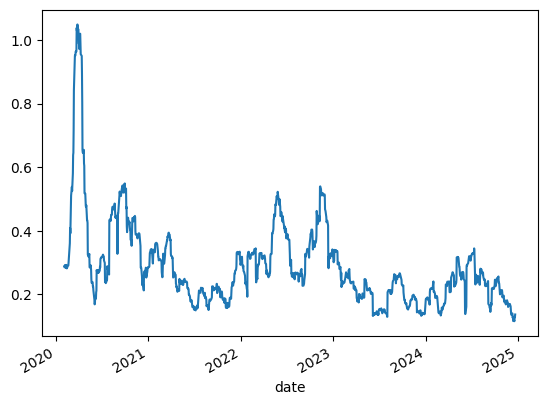

In [139]:
(close.pct_change().rolling(window=22).std() * np.sqrt(252)).plot()

>**팁**  
>Pandas에서 **rolling** 메서드는 특정 범위의 데이터를 가져와 함수나 메서드를 적용해 단일 값을 반환하고, 데이터를 한 단계씩 앞으로 이동하면서 같은 과정을 반복하는 방식입니다. 결과적으로 데이터의 전체 범위에 걸쳐 윈도우를 적용하여 메서드가 실행됩니다.

---

### **참고 자료**  
변동성은 알고리즘 트레이딩의 중요한 부분입니다. 변동성에 대해 더 알고 싶다면, 리스크 관리를 위해 투자자들이 변동성을 어떻게 생각하는지 설명하는 다음 기사를 참고하세요:  
[https://www.investopedia.com/terms/v/volatility.asp](https://www.investopedia.com/terms/v/volatility.asp)

## **누적 수익률 시리즈 생성**

누적 수익률은 특정 기간 동안의 투자 가치 변화의 총합을 나타냅니다. 단일 기간 수익률의 시리즈에 대해 누적 수익률을 계산하려면 각 수익률에 1을 더하고, 이 결과를 모두 곱한 후 최종적으로 1을 빼면 됩니다.  

단순 수익률 공식은 다음과 같습니다:

$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
$

$(\frac{P_t}{P_{t-2}}) = (\frac{P_t}{P_{t-1}})(\frac{P_{t-1}}{P_{t-2}})$ 를 적용하면, 두 기간의 수익률은 다음과 같이 표현됩니다:

$
R(2) = \left( \frac{P_t}{P_{t-1}} \right) \left( \frac{P_{t-1}}{P_{t-2}} \right) - 1
$

$
= (1 + R_t)(1 + R_{t-1}) - 1
$

연속적으로 복리 계산된 단일 기간 수익률의 시리즈에 대해 누적 수익률을 계산하려면 모든 단일 기간 수익률을 더해야 합니다. 이는 연속적으로 복리 계산된 수익률의 경우 로그 수익률이 가법적이기 때문입니다. 이를 설명하기 위해 두 기간의 복합 수익률을 정의합니다:

$
r_t(2) = \ln(1 + R_t(2)) = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1}) = p_t - p_{t-1}
$

양변의 지수 함수를 취하고 위의 공식을 정리하면 다음 결과를 얻습니다:

$
p_t = P_{t-2} e^{r_t(2)}
$

여기서 $r_t(2)$는 기간 $t-2$에서 $t$까지의 복합 가격 성장률입니다. $P_t \cdot P_{t-2} = (P_t \cdot P_{t-1})(P_{t-1} \cdot P_{t-2})$를 사용하고 $\ln(xy) = \ln(x) + \ln(y)$라는 성질을 적용하면 다음과 같은 결과를 얻습니다:

$
r(2) = \ln\left(\frac{P_t}{P_{t-1}}\right) + \ln\left(\frac{P_{t-1}}{P_{t-2}}\right)
$

$
= \ln\left(\frac{P_t}{P_{t-1}}\right) + \ln\left(\frac{P_{t-1}}{P_{t-2}}\right)
$

$
= r_t + r_{t-1}
$

### **준비하기...**

이전 레시피의 지침을 따랐다고 가정하며, 인덱스로 `DatetimeIndex` 객체를 사용하는 `close`라는 시리즈가 준비되어 있습니다.

---

### **어떻게 해야 할까...**

Pandas를 사용하여 단순 수익률과 복합 수익률의 누적 합계를 계산해 봅시다.

---

**단순 수익률의 누적 합계**

단순 수익률의 누적 합계부터 시작하겠습니다:

1. **단일 기간의 일별 단순 수익률 계산하기:**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

"yfinance" 제공자를 사용하여 2021-01-01부터 "AAPL" 주식의 과거 가격 데이터를 가져와서 'df'에 저장

In [140]:
df = obb.equity.price.historical("AAPL", start_date="2021-01-01", provider="yfinance")

In [141]:
display(df)

,open,high,low,close,volume,dividend
date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,143301900,0.0
2021-01-05,128.889999,131.740005,128.429993,131.009995,97664900,0.0
2021-01-06,127.720001,131.050003,126.379997,126.599998,155088000,0.0
2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0
2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0
...,...,...,...,...,...,...
2024-12-16,247.990005,251.380005,247.649994,251.039993,51694800,0.0
2024-12-17,250.080002,253.830002,249.779999,253.479996,51356400,0.0
2024-12-18,252.160004,254.279999,247.740005,248.050003,56774100,0.0


Selects the 'close' column from 'df' and stores it in 'close'

In [142]:
close = df["close"]

In [143]:
display(close)

date
2021-01-04    129.410004
2021-01-05    131.009995
2021-01-06    126.599998
2021-01-07    130.919998
2021-01-08    132.050003
                 ...    
2024-12-16    251.039993
2024-12-17    253.479996
2024-12-18    248.050003
2024-12-19    249.789993
2024-12-20    254.490005
Name: close, Length: 999, dtype: float64

'close' 가격의 백분율 변화를 계산하여 'returns'에 저장

In [151]:
returns = close.pct_change()

In [152]:
display(returns)

date
2021-01-04         NaN
2021-01-05    0.012364
2021-01-06   -0.033662
2021-01-07    0.034123
2021-01-08    0.008631
                ...   
2024-12-16    0.011728
2024-12-17    0.009720
2024-12-18   -0.021422
2024-12-19    0.007015
2024-12-20    0.018816
Name: close, Length: 999, dtype: float64

2. **NumPy의 `isnan` 메서드를 사용하여 `nan` 값을 0으로 대체하기:**

Replaces NaN values in 'returns' with 0

In [153]:
returns[np.isnan(returns)] = 0

참고: 이 작업은 pandas의 다음 코드와 동일합니다:

```python
returns.fillna(0.0, inplace=True)
```

In [154]:
display(returns)

date
2021-01-04    0.000000
2021-01-05    0.012364
2021-01-06   -0.033662
2021-01-07    0.034123
2021-01-08    0.008631
                ...   
2024-12-16    0.011728
2024-12-17    0.009720
2024-12-18   -0.021422
2024-12-19    0.007015
2024-12-20    0.018816
Name: close, Length: 999, dtype: float64

3. **각 일별 단순 수익률에 1을 더하기:**

누적곱 계산을 위해 'returns'에 1을 더함

In [155]:
returns += 1

In [156]:
display(returns)

date
2021-01-04    1.000000
2021-01-05    1.012364
2021-01-06    0.966338
2021-01-07    1.034123
2021-01-08    1.008631
                ...   
2024-12-16    1.011728
2024-12-17    1.009720
2024-12-18    0.978578
2024-12-19    1.007015
2024-12-20    1.018816
Name: close, Length: 999, dtype: float64

4. **`cumprod` 메서드를 사용하여 수익률의 누적 곱을 계산하고 1을 빼기:**

누적 수익률을 계산하고 1을 빼서 최종 누적 수익률을 구함

In [157]:
cumulative_returns = returns.cumprod() - 1

In [158]:
display(cumulative_returns)

date
2021-01-04    0.000000
2021-01-05    0.012364
2021-01-06   -0.021714
2021-01-07    0.011668
2021-01-08    0.020400
                ...   
2024-12-16    0.939881
2024-12-17    0.958736
2024-12-18    0.916776
2024-12-19    0.930222
2024-12-20    0.966540
Name: close, Length: 999, dtype: float64

5. **결과를 시각화하기:**

이제 누적 수익률을 나타내는 플롯이 생성됩니다.

<Axes: xlabel='date'>

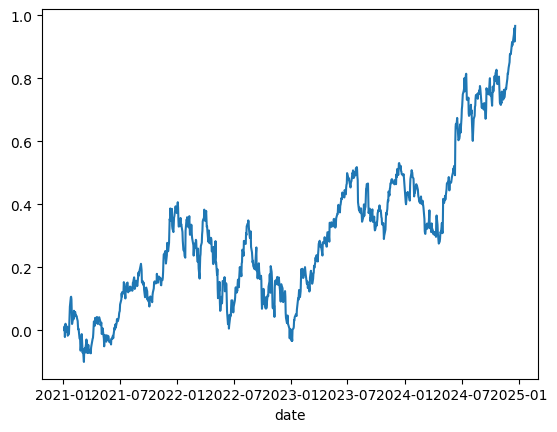

In [159]:
cumulative_returns.plot()

**복합 수익률의 누적 합계**

다음으로 복합 수익률의 누적 합계를 계산해 보겠습니다:

1. **단일 기간 복합 수익률 계산하기:**

'close' 가격의 로그 수익률을 계산

In [160]:
log_returns = np.log(close / close.shift())

In [161]:
display(log_returns)

date
2021-01-04         NaN
2021-01-05    0.012288
2021-01-06   -0.034241
2021-01-07    0.033554
2021-01-08    0.008594
                ...   
2024-12-16    0.011659
2024-12-17    0.009673
2024-12-18   -0.021655
2024-12-19    0.006990
2024-12-20    0.018641
Name: close, Length: 999, dtype: float64

2. **Pandas의 `cumsum` 메서드를 사용하여 수익률의 누적 합계 생성하기:**

로그 수익률의 누적 합계를 계산하여 누적 로그 수익률을 구함

In [162]:
cumulative_log_returns = log_returns.cumsum()

In [163]:
display(cumulative_log_returns)

date
2021-01-04         NaN
2021-01-05    0.012288
2021-01-06   -0.021953
2021-01-07    0.011601
2021-01-08    0.020195
                ...   
2024-12-16    0.662627
2024-12-17    0.672299
2024-12-18    0.650645
2024-12-19    0.657635
2024-12-20    0.676276
Name: close, Length: 999, dtype: float64

3. **결과를 시각화하기:**

다음과 같은 플롯이 생성됩니다.

<Axes: xlabel='date'>

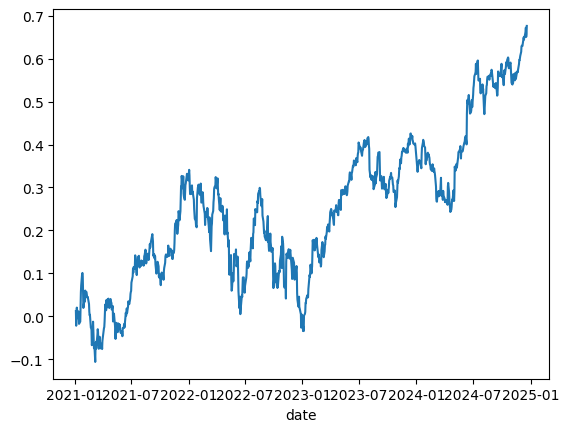

In [164]:
cumulative_log_returns.plot()

### **작동 원리...**

`isnan`은 `returns` 시리즈의 각 값을 확인하여 해당 값이 `nan`인지 검사합니다.  

```python
returns[np.isnan(returns)] = 0
```

이 코드는 `returns` 시리즈에서 `nan` 값이 있는 위치를 찾아 해당 값을 0으로 바꿉니다. 누적 단순 수익률을 계산하려면 먼저 모든 단일 기간 수익률에 **1**을 더해야 합니다.  

```python
returns += 1
```

마지막으로 `cumprod`를 사용하여 누적 곱을 생성합니다. `cumprod`는 시리즈의 값을 곱한 누적 값을 계산하고 결과를 저장합니다. 예를 들어, 시리즈에 **1, 2, 3, 4**가 있으면, `cumprod` 메서드는 다음과 같은 결과를 생성합니다:  

- 1 (**1**)  
- 2 (**1 × 2**)  
- 6 (**1 × 2 × 3**)  
- 24 (**1 × 2 × 3 × 4**)  

이후 누적 시리즈에서 1을 뺀 값을 통해 누적 단순 수익률을 계산합니다. 반면 **`cumsum`** 메서드는 값을 더하여 누적 합계를 생성합니다.

---

### **참고 자료**  

수익률을 계산하는 것은 간단해 보일 수 있지만, 단순 수익률과 복합 수익률의 차이를 이해하는 것이 중요합니다. 이와 관련된 더 많은 정보 및 방법은 다음 문서를 참조하세요:

- 단순 및 복합 수익률의 수학적 개요:  
  [https://bookdown.org/compfinezbook/introcompfin/AssetReturnCalculations.html#continuously-compounded-returns](https://bookdown.org/compfinezbook/introcompfin/AssetReturnCalculations.html#continuously-compounded-returns)

- pandas `cumsum` 메서드 문서:  
  [https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.cumsum.html)

- pandas `cumprod` 메서드 문서:  
  [https://pandas.pydata.org/docs/reference/api/pandas.Series.cumprod.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.cumprod.html)

## **다양한 시간 프레임으로 데이터 리샘플링하기**

리샘플링에는 두 가지 유형이 있습니다.  
- **업샘플링**: 데이터를 더 높은 빈도로 변환합니다 (예: 일별 데이터를 시간별 데이터로 변환).  
- **다운샘플링**: 데이터를 더 낮은 빈도로 변환합니다 (예: 일별 데이터를 월별 데이터로 변환).

금융 데이터 분석에서 리샘플링은 여러 방식으로 유용할 수 있습니다. 예를 들어, 일별 주식 가격이 있다면 이를 리샘플링하여 월별 또는 연간 평균 가격을 계산할 수 있으며, 이는 장기적 추세 분석에 유용합니다. 일반적인 사용 사례는 거래 데이터와 시세 데이터를 정렬하는 것입니다. 거래보다 시세의 수가 훨씬 많으며, 때로는 한 차원 더 많습니다. 시세와 거래의 타임스탬프가 다르기 때문에 이를 1초 단위로 리샘플링하는 것은 서로 다른 데이터 소스를 정렬하는 훌륭한 방법입니다.

---

### **어떻게 해야 할까...**

한 시간대에서 다른 시간대로 주식 가격 데이터를 리샘플링하는 작업을 해보겠습니다:

1. **필요한 라이브러리 가져오기:**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

2. **OpenBB 플랫폼을 사용하여 1분 단위의 실시간 데이터를 다운로드하기:**

Fetches historical intraday price data for the equity "AAPL" with 1-minute intervals using the "yfinance" provider and stores it in 'df'

In [165]:
df = obb.equity.price.historical("AAPL", interval="1m", provider="yfinance")

In [166]:
display(df)

,open,high,low,close,volume
date,,,,,
2024-12-16 09:30:00,248.000000,248.539993,247.649994,248.100006,1697243
2024-12-16 09:31:00,248.139999,248.850006,248.059998,248.839996,316668
2024-12-16 09:32:00,248.804993,249.619995,248.804993,249.449997,351728
2024-12-16 09:33:00,249.449600,249.800003,249.399994,249.699997,184272
2024-12-16 09:34:00,249.705002,249.990005,249.679993,249.926605,197991
...,...,...,...,...,...
2024-12-20 15:55:00,253.654999,254.580002,253.517303,254.050003,688283
2024-12-20 15:56:00,254.070007,254.130005,253.820007,253.820007,439565
2024-12-20 15:57:00,253.815002,253.940002,253.689804,253.940002,378825


3. **1분 단위로 제공된 조정 종가 데이터를 시간별로 리샘플링하기:**

'df'의 'close' 열을 시간별 빈도로 리샘플링하여 'resampled'에 저장

In [167]:
resampled = df.resample(rule="h")["close"]

In [169]:
resampled

4. **리샘플링된 시간 간격에서 첫 번째 값을 가져오기:**

리샘플링된 데이터에서 각 시간의 첫 번째 값을 표시

In [168]:
resampled.first()

date
2024-12-16 09:00:00    248.100006
2024-12-16 10:00:00    248.835007
2024-12-16 11:00:00    249.190002
2024-12-16 12:00:00    250.134995
2024-12-16 13:00:00    251.115005
                          ...    
2024-12-20 11:00:00    250.070007
2024-12-20 12:00:00    253.080002
2024-12-20 13:00:00    253.330002
2024-12-20 14:00:00    252.919998
2024-12-20 15:00:00    253.629898
Freq: h, Name: close, Length: 103, dtype: float64

**결과:**  위 코드의 출력은 시간별로 리샘플링된 데이터의 첫 번째 값입니다.

5. 이제 마지막 값을 가져오기:
 
리샘플링된 데이터에서 각 시간의 마지막 값을 표시

In [170]:
resampled.last()

date
2024-12-16 09:00:00    248.604996
2024-12-16 10:00:00    249.300003
2024-12-16 11:00:00    250.274994
2024-12-16 12:00:00    251.285904
2024-12-16 13:00:00    250.860001
                          ...    
2024-12-20 11:00:00    253.139999
2024-12-20 12:00:00    253.355896
2024-12-20 13:00:00    252.865005
2024-12-20 14:00:00    253.602798
2024-12-20 15:00:00    254.589996
Freq: h, Name: close, Length: 103, dtype: float64

6. 리샘플링된 시간 간격 내의 평균값 계산:
 
리샘플링된 데이터에서 각 시간의 평균값을 계산

In [171]:
resampled.mean()

date
2024-12-16 09:00:00    249.250191
2024-12-16 10:00:00    249.102227
2024-12-16 11:00:00    249.777825
2024-12-16 12:00:00    250.339125
2024-12-16 13:00:00    250.985076
                          ...    
2024-12-20 11:00:00    252.092471
2024-12-20 12:00:00    253.504763
2024-12-20 13:00:00    253.090615
2024-12-20 14:00:00    253.323720
2024-12-20 15:00:00    253.665445
Freq: h, Name: close, Length: 103, dtype: float64

7. 리샘플링된 시간 간격에 대한 시가, 고가, 저가, 종가 값 생성:

리샘플링된 데이터에서 각 시간의 시가(open), 고가(high), 저가(low), 종가(close) (OHLC)를 계산

In [172]:
resampled.ohlc()

,open,high,low,close
date,,,,
2024-12-16 09:00:00,248.100006,249.990005,248.100006,248.604996
2024-12-16 10:00:00,248.835007,249.464996,248.646896,249.300003
2024-12-16 11:00:00,249.190002,250.274994,249.190002,250.274994
2024-12-16 12:00:00,250.134995,251.320007,249.794998,251.285904
2024-12-16 13:00:00,251.115005,251.210007,250.610001,250.860001
...,...,...,...,...
2024-12-20 11:00:00,250.070007,253.318207,250.070007,253.139999
2024-12-20 12:00:00,253.080002,253.917603,253.080002,253.355896
2024-12-20 13:00:00,253.330002,253.385803,252.720001,252.865005


### **작동 원리...**

`resample` 메서드는 시계열 데이터를 리샘플링하여 빈도를 변경하는 데 사용됩니다. 일별 데이터를 시간별(`D` 또는 `H`) 또는 월별(`M`) 데이터로 변환하는 등의 새 샘플링 비율을 결정할 수 있습니다. 이 메서드는 **Resampler** 객체를 생성하며, 해당 객체에 집계 또는 변환 함수(예: `mean` 또는 `sum`)를 적용할 수 있습니다. 결과로 만들어진 DataFrame 또는 시리즈는 데이터를 새 빈도로 집계하거나 재배치합니다.  

또한, **closed** 매개변수를 통해 어떤 쪽의 경계를 닫을지 지정할 수 있으며, **label** 매개변수는 집계 결과에 사용할 레이블 위치를 선택합니다.

---

**`resample` 메서드의 유용한 인수들**

- **`rule`**: 목표 변환 빈도를 나타내는 오프셋 문자열 또는 객체입니다.  
- **`axis`**: 리샘플링할 축을 지정합니다. 기본값은 `0` (인덱스)입니다.  
- **`closed`**: 빈 구간의 어느 쪽을 닫을지 지정합니다. 옵션은 `right` 또는 `left`입니다.  
- **`label`**: 어떤 빈 가장자리 레이블을 사용할지 지정합니다. 옵션은 `right` 또는 `left`입니다.  
- **`convention`**: 기간 데이터를 리샘플링할 때 사용됩니다 (`PeriodIndex`). 옵션은 `start` 또는 `end`이며, 기본값은 `end`입니다.  
- **`kind`**: 낮은 빈도에서 높은 빈도로 업샘플링할 때 사용됩니다. 옵션은 `timestamp` 또는 `period`입니다. 기본값은 `timestamp`입니다.  
- **`loffset`**: 리샘플링된 시간 레이블을 조정합니다.  
- **`base`**: 빈의 시작점을 조정할 때 사용됩니다.  
- **`on`**: DataFrame의 특정 열을 기준으로 리샘플링할 때 사용됩니다 (DataFrame 인덱스 대신).  
- **`level`**: `MultiIndex` DataFrame에서 특정 수준의 시간을 기준으로 리샘플링할 때 사용됩니다.  
- **`origin`**: 조정된 타임스탬프의 기준점을 정의합니다.  
- **`offset`**: 시간 차이에 따라 빈의 시작점을 조정합니다.

---

### **더 알아보기...**

Pandas의 `resample`과 `asfreq` 메서드는 시계열 데이터의 빈도를 변경하는 데 사용되지만, 서로 다른 목적과 상황에 적합합니다.  

- **`resample`**: 주로 **다운샘플링**에 사용되며, 다양한 방법으로 데이터를 집계합니다 (예: 평균, 합계, 최소값, 최대값 등). 업샘플링 시, 임의의 함수를 전달해 결측값을 보간할 수 있습니다.  

- **`asfreq`**: 데이터를 특정 빈도로 변환할 때 사용됩니다. 집계나 변환 없이 단순히 빈도를 변경합니다. 업샘플링 시 새로 생성된 데이터 포인트에 `nan` 값이 추가됩니다. 다운샘플링 시, 새 빈도에 맞지 않는 데이터 포인트는 버려집니다.

---

Pandas는 `resample`과 `asfreq`에 사용할 수 있는 **40개 이상의 오프셋**을 제공합니다. 이러한 오프셋을 사용하면 유연하게 빈도를 조정할 수 있습니다. 전체 목록을 보려면 다음 코드를 실행하세요:

```python
pd.offsets.__all__
```

**분 단위 데이터를 일 단위로 다운샘플링하고 인덱스를 빈도에 맞게 조정하기:**

'df'를 일별 빈도로 변환하여 'ddf'에 저장

In [173]:
ddf = df.asfreq("D").to_period()

결과는 DataFrame이며, 인덱스의 시간 부분이 제거됩니다. 시장 데이터가 없는 날에는 해당 값이 `nan`으로 표시됩니다.

In [174]:
display(ddf)

,open,high,low,close,volume
date,,,,,
2024-12-16,248.000000,248.539993,247.649994,248.100006,1697243
2024-12-17,250.134995,251.250000,250.000000,250.639999,1560615
2024-12-18,252.220001,253.399994,252.169998,253.149994,1472998
2024-12-19,247.460007,248.289993,247.100601,248.059998,1885316
2024-12-20,248.119995,248.309998,247.580093,248.100006,14137944


**`asfreq` 메서드 설명**

`asfreq` 메서드는 **`method`** 인수를 포함하며, pandas가 `nan` 값을 처리하는 방법을 지정합니다. 이 인수는 다음 중 하나를 허용합니다:

- **`backfill`**: `nan` 값을 다음 유효한 관측치로 채웁니다.  
- **`pad`**: `nan` 값을 이전 유효한 관측치로 채웁니다.  

또한, **`fill_value`** 매개변수를 사용하면 업샘플링 과정 중 결측 항목을 채울 사용자 정의 값을 지정할 수 있습니다.

---

**시장 가격이 없는 날을 제외하려면**

시장 가격이 없는 날을 포함하지 않도록 하려면 비즈니스 데이 오프셋을 사용할 수 있습니다:

'df'를 영업일 빈도로 변환하여 'ddf'에 저장

In [175]:
ddf = df.asfreq(pd.offsets.BDay())

이 코드의 출력은 유효한 영업일만 포함하는 DataFrame이 됩니다.

In [176]:
display(ddf)

,open,high,low,close,volume
date,,,,,
2024-12-16 09:30:00,248.000000,248.539993,247.649994,248.100006,1697243
2024-12-17 09:30:00,250.134995,251.250000,250.000000,250.639999,1560615
2024-12-18 09:30:00,252.220001,253.399994,252.169998,253.149994,1472998
2024-12-19 09:30:00,247.460007,248.289993,247.100601,248.059998,1885316
2024-12-20 09:30:00,248.119995,248.309998,247.580093,248.100006,14137944


**중요**

`resample`은 선택된 간격 내 데이터에 집계 함수를 적용합니다 (예: **`mean`, `ohlc`** 등). 반면, **`asfreq`**는 인덱스를 변경하지만 데이터를 집계하지 않습니다. 이는 인덱스의 시간 부분이 표시되는 **Figure 2.23**에서 명확하게 볼 수 있습니다. 예를 들어, **`2023-07-12 09:30:00`**과 같은 값을 선택하면 반환된 DataFrame의 첫 번째 행에서 해당 값과 일치하는 값이 포함됩니다:

```python
df.loc["2023-07-12 09:30:00"]
```

---

### **참고 자료**  
`resample`과 `asfreq`의 차이에 대해 더 알고 싶다면 다음 문서를 참조하세요:

- **Pandas `resample` 메서드 문서**:  
  [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html)

- **Pandas `asfreq` 메서드 문서**:  
  [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html)

## **결측 데이터 문제 해결**

Pandas는 시계열 데이터의 결측값을 처리하는 데 뛰어나며, 금융 시장 데이터의 경우 다양한 이유로 결측 데이터가 발생할 수 있습니다:

- **시장 휴장**: 대부분의 금융 시장은 24시간, 7일 내내 운영되지 않습니다. 주말, 공휴일, 특별 이벤트에는 시장이 휴장하기 때문에 데이터를 가져올 수 없으면 결측값으로 나타날 수 있습니다.  
- **데이터 가용성**: 모든 시장이나 모든 증권에 대한 과거 데이터가 항상 제공되지는 않습니다. 일부 시장은 특정 날짜의 데이터만 제공하거나 기술적 문제, 오류, 데이터 기록 및 전송 중 발생한 문제로 일부 데이터가 누락될 수 있습니다.  
- **증권 상장 폐지**: 증권이 시장에서 상장 폐지되면 (예: 회사가 폐업할 경우), 해당 증권에 대한 새로운 데이터는 더 이상 생성되지 않습니다. 시간 프레임이 상장 폐지 날짜를 초과하면 결측 데이터가 발생합니다.  
- **데이터 세분성**: 데이터셋의 세부 수준도 결측값에 영향을 줄 수 있습니다. 예를 들어, 분 단위 데이터를 찾고 있지만 데이터 소스가 시간별 데이터만 제공하는 경우 새 시간이 시작되지 않은 각 분에 대한 데이터는 결측값으로 나타납니다.

Pandas는 결측 데이터를 처리하는 여러 가지 방법을 제공합니다. 이는 알고리즘 트레이딩에서 특히 유용합니다.

### **준비하기...**

AAPL의 주식 가격 데이터를 사용하여 결측값을 채우는 몇 가지 방법을 시연해 보겠습니다.

1. **필요한 라이브러리 가져오기:**

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

2. **주식 가격 데이터 다운로드하기:**

"yfinance" 제공자를 사용하여 2020-07-01부터 2023-07-06까지의 "AAPL" 주식의 과거 가격 데이터를 가져와서 'df'에 저장

In [177]:
df = obb.equity.price.historical(
    "AAPL",
    start_date="2020-07-01",
    end_date="2023-07-06",
    provider="yfinance",
)

In [178]:
display(df)

,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
2020-07-01,91.279999,91.839996,90.977501,91.027496,110737200,0.0,0.0
2020-07-02,91.962502,92.617500,90.910004,91.027496,114041600,0.0,0.0
2020-07-06,92.500000,93.945000,92.467499,93.462502,118655600,0.0,0.0
2020-07-07,93.852501,94.654999,93.057503,93.172501,112424400,0.0,0.0
2020-07-08,94.180000,95.375000,94.089996,95.342499,117092000,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-29,189.080002,190.070007,188.940002,189.589996,46347300,0.0,0.0
2023-06-30,191.630005,194.479996,191.259995,193.970001,85069600,0.0,0.0
2023-07-03,193.779999,193.880005,191.759995,192.460007,31458200,0.0,0.0


3. **AAPL 데이터는 거래일만 포함하기 때문에 시작일과 종료일 사이의 모든 달력을 포함하도록 DataFrame 인덱스 재설정하기:**

먼저 **DatetimeIndex** 객체를 사용하여 달력 날짜를 생성합니다:

'df'의 최소 날짜부터 최대 날짜까지 일별 빈도로 날짜 범위를 생성하여 'calendar_dates'에 저장

In [5]:
calendar_dates = pd.date_range(start=df.index.min(), end=df.index.max(), freq="D")

In [6]:
display(calendar_dates)

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10',
               ...
               '2023-06-27', '2023-06-28', '2023-06-29', '2023-06-30',
               '2023-07-01', '2023-07-02', '2023-07-03', '2023-07-04',
               '2023-07-05', '2023-07-06'],
              dtype='datetime64[ns]', length=1101, freq='D')

4. **DataFrame의 인덱스를 재설정하기:**

Reindexes 'df' to the 'calendar_dates', introducing missing values for non-trading days, and stores it in 'calendar_prices'

In [7]:
calendar_prices = df.reindex(calendar_dates)

5. **결과적으로 생성된 DataFrame에는 데이터가 없는 부분에 `NaN` 값이 채워져 있습니다.**

In [8]:
display(calendar_prices)

,open,high,low,close,volume,split_ratio,dividend
2020-07-01,91.279999,91.839996,90.977501,91.027496,110737200.0,0.0,0.0
2020-07-02,91.962502,92.617500,90.910004,91.027496,114041600.0,0.0,0.0
2020-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2023-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-03,193.779999,193.880005,191.759995,192.460007,31458200.0,0.0,0.0
2023-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-05,191.570007,192.979996,190.619995,191.330002,46920300.0,0.0,0.0


### **어떻게 해야 할까...**

결측값을 채우는 몇 가지 예제를 보여드리겠습니다:

1. **Pandas의 `fillna` 메서드를 사용하여 결측값(`nan`)을 다음 유효한 값으로 채우기**  
   `method` 인수를 **`bfill`** 로 설정합니다:

Backfills missing values in 'calendar_prices' and stores the result in 'df_1'

In [9]:
df_1 = calendar_prices.bfill()

결측값이 채워진 DataFrame이 생성됩니다.

In [10]:
display(df_1)

,open,high,low,close,volume,split_ratio,dividend
2020-07-01,91.279999,91.839996,90.977501,91.027496,110737200.0,0.0,0.0
2020-07-02,91.962502,92.617500,90.910004,91.027496,114041600.0,0.0,0.0
2020-07-03,92.500000,93.945000,92.467499,93.462502,118655600.0,0.0,0.0
2020-07-04,92.500000,93.945000,92.467499,93.462502,118655600.0,0.0,0.0
2020-07-05,92.500000,93.945000,92.467499,93.462502,118655600.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-02,193.779999,193.880005,191.759995,192.460007,31458200.0,0.0,0.0
2023-07-03,193.779999,193.880005,191.759995,192.460007,31458200.0,0.0,0.0
2023-07-04,191.570007,192.979996,190.619995,191.330002,46920300.0,0.0,0.0
2023-07-05,191.570007,192.979996,190.619995,191.330002,46920300.0,0.0,0.0


2. ffill을 사용하여 마지막 유효한 관측값을 앞으로 전파:

calendar_prices의 결측값을 앞으로 채우고 결과를 df_1에 저장

In [11]:
df_1 = calendar_prices.ffill()

In [12]:
display(df_1)

,open,high,low,close,volume,split_ratio,dividend
2020-07-01,91.279999,91.839996,90.977501,91.027496,110737200.0,0.0,0.0
2020-07-02,91.962502,92.617500,90.910004,91.027496,114041600.0,0.0,0.0
2020-07-03,91.962502,92.617500,90.910004,91.027496,114041600.0,0.0,0.0
2020-07-04,91.962502,92.617500,90.910004,91.027496,114041600.0,0.0,0.0
2020-07-05,91.962502,92.617500,90.910004,91.027496,114041600.0,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-02,191.630005,194.479996,191.259995,193.970001,85069600.0,0.0,0.0
2023-07-03,193.779999,193.880005,191.759995,192.460007,31458200.0,0.0,0.0
2023-07-04,193.779999,193.880005,191.759995,192.460007,31458200.0,0.0,0.0
2023-07-05,191.570007,192.979996,190.619995,191.330002,46920300.0,0.0,0.0


### **작동 원리...**

Pandas의 **`fillna`** 메서드는 결측값을 처리하는 다양한 인수를 제공합니다:

- **`value`**: 결측값(`NA`/`NaN`)을 채우기 위해 사용할 값을 지정합니다. 이는 스칼라, 딕셔너리, 또는 시리즈일 수 있습니다.  
- **`axis`**: 결측값을 채울 축을 지정합니다. 행(`0` 또는 `index`) 또는 열(`1` 또는 `columns`)을 지정할 수 있습니다.  
- **`inplace`**: `True`로 설정하면, 데이터가 제자리에서 수정됩니다. 기본값은 `False`입니다.  
- **`limit`**: 연속된 값 채우기의 최대 횟수를 제한합니다.  
- **`downcast`**: 각 항목의 데이터 타입을 지정하는 **`item->dtype`** 형식의 딕셔너리입니다.

---

### **더 알아보기...**

단순한 **전방 채우기**(forward-filling)나 **후방 채우기**(back-filling) 기법만으로는 충분하지 않을 때가 있습니다. 특히 더 복잡한 상황(예: 파생상품 가격을 위한 내재 변동성 표면 생성)에서는 보다 정교한 결측 데이터 처리 기법이 필요합니다. pandas의 **`interpolate`** 메서드는 선형, 다항식, 시간, 공간 보간법 등 다양한 보간법을 사용하여 결측값을 채울 수 있습니다. 보간법은 데이터의 특성에 따라 선택할 수 있으며, 결측값을 보다 정확하게 처리할 수 있습니다.

**선형 보간법**을 사용한 예시:

Reindexes 'df' to the 'calendar_dates' and performs linear interpolation to fill missing values, storing the result in 'linear'

In [13]:
calendar_prices = df.reindex(calendar_dates)
linear = calendar_prices.interpolate(method="linear")

In [14]:
display(linear)

,open,high,low,close,volume,split_ratio,dividend
2020-07-01,91.279999,91.839996,90.977501,91.027496,1.107372e+08,0.0,0.0
2020-07-02,91.962502,92.617500,90.910004,91.027496,1.140416e+08,0.0,0.0
2020-07-03,92.096876,92.949375,91.299377,91.636248,1.151951e+08,0.0,0.0
2020-07-04,92.231251,93.281250,91.688751,92.244999,1.163486e+08,0.0,0.0
2020-07-05,92.365625,93.613125,92.078125,92.853750,1.175021e+08,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-02,193.063334,194.080002,191.593328,192.963338,4.932867e+07,0.0,0.0
2023-07-03,193.779999,193.880005,191.759995,192.460007,3.145820e+07,0.0,0.0
2023-07-04,192.675003,193.430000,191.189995,191.895004,3.918925e+07,0.0,0.0
2023-07-05,191.570007,192.979996,190.619995,191.330002,4.692030e+07,0.0,0.0


**큐빅 스플라인 보간법**을 사용한 예시:

Reindexes 'df' to the 'calendar_dates' and performs cubic spline interpolation to fill missing values, storing the result in 'cubic'

In [15]:
calendar_prices = df.reindex(calendar_dates)
cubic = calendar_prices.interpolate(method="cubicspline")

위 두 경우 모두 결측값이 채워진 DataFrame이 반환됩니다.

In [16]:
display(cubic)

,open,high,low,close,volume,split_ratio,dividend
2020-07-01,91.279999,91.839996,90.977501,91.027496,1.107372e+08,0.000000e+00,0.000000e+00
2020-07-02,91.962502,92.617500,90.910004,91.027496,1.140416e+08,0.000000e+00,0.000000e+00
2020-07-03,91.905178,93.018261,91.109728,91.804272,1.181507e+08,3.592598e-24,1.363686e-15
2020-07-04,91.628604,93.240770,91.492200,92.824548,1.213994e+08,7.185197e-24,2.727373e-15
2020-07-05,91.653353,93.483519,91.972948,93.555050,1.221227e+08,7.185197e-24,2.727373e-15
...,...,...,...,...,...,...,...
2023-07-02,194.071253,195.513330,192.326285,194.488423,5.806444e+07,0.000000e+00,-2.115795e-21
2023-07-03,193.779999,193.880005,191.759995,192.460007,3.145820e+07,0.000000e+00,0.000000e+00
2023-07-04,192.906895,193.224617,191.295466,191.403875,3.331034e+07,0.000000e+00,4.882604e-22
2023-07-05,191.570007,192.979996,190.619995,191.330002,4.692030e+07,0.000000e+00,0.000000e+00


---

### **참고 자료**

**`fillna`** 및 **보간법(interpolation)** 에 대해 더 알고 싶다면 다음 문서를 참조하세요:

- **Pandas `fillna` 메서드 문서**:  
  [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

- **Pandas `interpolate` 메서드 문서**:  
  [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

- **보간법에 대한 더 많은 정보**:  
  [https://en.wikipedia.org/wiki/Interpolation](https://en.wikipedia.org/wiki/Interpolation)

## **시계열 데이터를 분석하기 위한 사용자 정의 함수 적용**

사용자 정의 함수를 사용하면 pandas의 표준 메서드를 넘어 데이터를 변환하고 계산할 수 있습니다. 이러한 유연성은 고유하거나 복잡한 분석 작업을 수행할 때 중요합니다. **`apply`** 함수는 사용자 정의 또는 내장 함수를 인수로 받아 DataFrame이나 시리즈 전체에 이를 적용한 결과를 반환합니다.

> **중요**  
> **`apply`** 함수는 각 행 또는 열에서 루프를 실행하므로 실행 속도가 매우 느릴 수 있습니다. 대규모 DataFrame을 처리할 때는 주의해서 사용하세요!

### **준비하기...**

이전 레시피의 지침을 따랐다고 가정하며, **`df`**라는 **`DatetimeIndex`**를 가진 DataFrame이 준비되어 있다고 가정합니다.

### **어떻게 해야 할까...**

이 레시피에서는 **가격 범위**(최고가에서 최저가를 뺀 값)를 사용자 정의 함수로 계산하겠습니다:

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
from openbb import obb

In [2]:
obb.user.preferences.output_type = "dataframe"

Fetches historical price data for the equity "AAPL" using the "yfinance" provider and stores it in 'df'

In [3]:
df = obb.equity.price.historical("AAPL", provider="yfinance")

In [4]:
display(df)

,open,high,low,close,volume,split_ratio,dividend
date,,,,,,,
2023-06-15,183.960007,186.520004,183.779999,186.009995,65433200,0.0,0.0
2023-06-16,186.729996,186.990005,184.270004,184.919998,101235600,0.0,0.0
2023-06-20,184.410004,186.100006,184.410004,185.009995,49799100,0.0,0.0
2023-06-21,184.899994,185.410004,182.589996,183.960007,49515700,0.0,0.0
2023-06-22,183.740005,187.050003,183.669998,187.000000,51245300,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-10,196.899994,197.300003,192.149994,193.119995,97262100,0.0,0.0
2024-06-11,193.649994,207.160004,193.630005,207.149994,172373300,0.0,0.0
2024-06-12,207.369995,220.199997,206.899994,213.070007,198134300,0.0,0.0


1. **익명 람다(lambda) 함수를 사용하여 주식 가격 범위를 계산하기:**

Applies a lambda function to calculate the difference between the high and low prices for each row

In [5]:
df.apply(lambda x: x["high"] - x["low"], axis=1)

date
2023-06-15     2.740005
2023-06-16     2.720001
2023-06-20     1.690002
2023-06-21     2.820007
2023-06-22     3.380005
                ...    
2024-06-10     5.150009
2024-06-11    13.529999
2024-06-12    13.300003
2024-06-13     5.149994
2024-06-14     3.869995
Length: 252, dtype: float64

2. **동일한 작업을 수행하는 사용자 정의 함수 적용하기:**

Defines a function 'fcn' that calculates the difference between the high and low prices for each row

In [6]:
def fcn(row):
    return row["high"] - row["low"]

위 두 경우 모두 최고가에서 최저가를 뺀 결과를 포함하는 **Series**가 반환됩니다.

Applies the 'fcn' function to each row of 'df'

In [7]:
df.apply(fcn, axis=1)

date
2023-06-15     2.740005
2023-06-16     2.720001
2023-06-20     1.690002
2023-06-21     2.820007
2023-06-22     3.380005
                ...    
2024-06-10     5.150009
2024-06-11    13.529999
2024-06-12    13.300003
2024-06-13     5.149994
2024-06-14     3.869995
Length: 252, dtype: float64

**3. 데이터의 유효성을 테스트하기**  

닫는 가격이 최저가보다 낮거나 최고가보다 높을 때를 플래그하여 데이터의 유효성을 검사합니다:

Adds a new column 'valid' to 'df' that checks if the 'close' price is between 'low' and 'high' prices for each row

In [8]:
df["valid"] = df.apply(lambda x: x["low"] <= x["close"] <= x["high"], axis=1)

모든 값이 유효하므로 결과는 비어 있는 DataFrame입니다.

In [9]:
display(df)

,open,high,low,close,volume,split_ratio,dividend,valid
date,,,,,,,,
2023-06-15,183.960007,186.520004,183.779999,186.009995,65433200,0.0,0.0,True
2023-06-16,186.729996,186.990005,184.270004,184.919998,101235600,0.0,0.0,True
2023-06-20,184.410004,186.100006,184.410004,185.009995,49799100,0.0,0.0,True
2023-06-21,184.899994,185.410004,182.589996,183.960007,49515700,0.0,0.0,True
2023-06-22,183.740005,187.050003,183.669998,187.000000,51245300,0.0,0.0,True
...,...,...,...,...,...,...,...,...
2024-06-10,196.899994,197.300003,192.149994,193.119995,97262100,0.0,0.0,True
2024-06-11,193.649994,207.160004,193.630005,207.149994,172373300,0.0,0.0,True
2024-06-12,207.369995,220.199997,206.899994,213.070007,198134300,0.0,0.0,True


Filters 'df' to create 'ddf' that contains rows where 'valid' is False

In [10]:
ddf = df[df.valid == False]

In [11]:
display(ddf)

,open,high,low,close,volume,split_ratio,dividend,valid
date,,,,,,,,


### **작동 원리...**

Pandas의 **`apply`** 함수는 **익명 람다(lambda) 함수** 또는 사용자 정의 함수를 인수로 받아들입니다. 주식 가격 범위를 계산하는 코드의 경우 람다를 사용하든 사용자 정의 함수를 사용하든 동일한 결과를 얻을 수 있습니다. 계산을 각 행에 적용하려면 **`axis=1`**을 인수로 전달합니다.

**`apply`** 함수는 다음과 같은 유용한 인수를 지원합니다:

- **`func`**: DataFrame의 각 행 또는 열에 적용할 함수입니다.  
- **`axis`**: 함수 적용 방향을 설정합니다 (행: `0` 또는 `index`, 열: `1` 또는 `columns`).  
- **`broadcast`**: 함수의 출력 결과를 DataFrame에 브로드캐스트할지 여부를 설정합니다.  
- **`raw`**: `True`로 설정하면, 함수는 시리즈 또는 DataFrame 대신 배열을 받습니다.  
- **`reduce`**: `True`로 설정하면, 축소 절차를 시도합니다.  
- **`result_type`**: 출력 유형을 제어합니다 (`expand`, `reduce`, `broadcast` 또는 `None`).  
- **`args`**: `func`에 전달할 추가 위치 인수입니다.

---

### **더 알아보기...**

`apply` 메서드에 전달되는 함수는 **추가 인수**를 받을 수 있습니다. 예를 들어, 두 열 간의 가격 범위를 계산하되 특정 임계값보다 낮은 범위는 무시하고 싶다고 가정해 봅시다.

**사용자 정의 함수 정의하기:**

Defines a function 'calculate_range' that calculates the range between 'high' and 'low' prices and returns it if it exceeds a threshold, otherwise returns NaN

In [12]:
def calculate_range(row, high_col, low_col, threshold):
    range = row[high_col] - row[low_col]
    return range if range > threshold else np.nan

> **중요 사항**  
> Pandas **`apply`** 함수가 **`axis=1`** 인수와 함께 호출되면 DataFrame의 각 행이 **pandas 시리즈 객체**로 처리됩니다. 시리즈 객체는 행 전체를 나타내며, 인덱스는 DataFrame의 열 이름입니다.

Sets a threshold value

In [13]:
threshold = 1.5

이제 이 함수를 **`apply`** 메서드를 사용해 DataFrame에 적용할 수 있습니다. **`args`**를 통해 추가 인수를 함수에 전달할 수 있습니다:

Applies the 'calculate_range' function to each row of 'df' to calculate the range and adds it as a new column 'range'

In [14]:
df["range"] = df.apply(calculate_range, args=("high", "low", threshold), axis=1)

이 연산의 결과는 DataFrame에 새로운 열로 추가되며, 계산된 가격 범위가 임계값을 초과하는 경우에만 해당 값이 표시됩니다. 그렇지 않으면 `NaN`이 반환됩니다.

In [15]:
display(df)

,open,high,low,close,volume,split_ratio,dividend,valid,range
date,,,,,,,,,
2023-06-15,183.960007,186.520004,183.779999,186.009995,65433200,0.0,0.0,True,2.740005
2023-06-16,186.729996,186.990005,184.270004,184.919998,101235600,0.0,0.0,True,2.720001
2023-06-20,184.410004,186.100006,184.410004,185.009995,49799100,0.0,0.0,True,1.690002
2023-06-21,184.899994,185.410004,182.589996,183.960007,49515700,0.0,0.0,True,2.820007
2023-06-22,183.740005,187.050003,183.669998,187.000000,51245300,0.0,0.0,True,3.380005
...,...,...,...,...,...,...,...,...,...
2024-06-10,196.899994,197.300003,192.149994,193.119995,97262100,0.0,0.0,True,5.150009
2024-06-11,193.649994,207.160004,193.630005,207.149994,172373300,0.0,0.0,True,13.529999
2024-06-12,207.369995,220.199997,206.899994,213.070007,198134300,0.0,0.0,True,13.300003


### **참고 자료**  

**`apply`** 메서드에 대한 더 많은 정보를 확인하려면 다음 문서를 참조하세요:  
[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html)